## Build MRCNN Model -Load MRCNN and FCN weights - Load Training Files  

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys,os, pprint, pickle
pp = pprint.PrettyPrinter(indent=2, width=100)
print('Current working dir: ', os.getcwd())
if '..' not in sys.path:
    print("appending '..' to sys.path")
    sys.path.append('..')
import platform    
import numpy as np
import matplotlib.pyplot as plt
from matplotlib          import cm
import mrcnn.utils       as utils
import mrcnn.visualize   as visualize
import mrcnn.visualize_2   as vis2
from mrcnn.prep_notebook import build_fcn_training_pipeline, run_mrcnn_training_pipeline
from mrcnn.prep_notebook import build_fcn_inference_pipeline_newshapes, build_mrcnn_inference_pipeline
from mrcnn.prep_notebook import run_mrcnn_detection
from mrcnn.visualize     import display_training_batch
from mrcnn.prep_notebook import get_inference_batch, get_image_batch, run_mrcnn_detection, run_fcn_detection
from mrcnn.coco          import prep_coco_dataset
from mrcnn.newshapes     import prep_newshape_dataset

syst = platform.system()
if syst == 'Windows':
    save_path     = "E:/git_projs/MRCNN3/train_newshapes_2/other"
    FCN_DIR_WEIGHTS =  'F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000' ### Training with LR=0.00001, MSE Loss NO L2 Regularization
elif syst == 'Linux':
    save_path     = "/home/kbardool/mrcnn3/train_newshapes_2/other"
    FCN_DIR_WEIGHTS =  '/home/kbardool/models_newshapes2/train_fcn8L2_BCE/fcn20190323T0000'    
    # DIR_WEIGHTS = "/home/kbardool/models_newshapes/train_fcn8L2_BCE2/fcn20190131T0000"     
else :
    raise Error('unrecognized system ')
    
# WEIGHT_FILE = 'F:/models/train_fcn8_coco_adam/fcn20181109T0000/fcn_2298.h5' 
# FCN_WEIGHT_FILE = 'F:\\models_newshapes\\train_fcn8_l2_newshapes\\fcn20181224T0000\\fcn_0821.h5'
##------------------------------------------------------------------------------------
## Parse command line arguments
##------------------------------------------------------------------------------------
parser = utils.command_line_parser()
input_parms  =" --batch_size     1  "
input_parms +=" --dataset        newshapes2 "
input_parms +=" --mrcnn_logs_dir train_mrcnn "
input_parms +=" --fcn_logs_dir   train_fcn8L2_BCE " 
input_parms +=" --mrcnn_model    last "
input_parms +=" --fcn_model      last "
# input_parms +=" --fcn_model      last "
input_parms +=" --fcn_layer      all"
input_parms +=" --fcn_arch       fcn8l2 " 
input_parms +=" --sysout         screen "
input_parms +=" --scale_factor   1"
# input_parms +=" --coco_classes  
args = parser.parse_args(input_parms.split())
utils.display_input_parms(args)

CLASS_NAMES = ['BG','person', 'car', 'sun', 'building', 'tree', 'cloud', 'airplane', 'truck']
CLASS_IDS = [1,2,3,4,5,6,7,8]    


Current working dir:  /home/kbardool/git_projs/mrcnn3/notebooks
appending '..' to sys.path


Using TensorFlow backend.


 Init Image Class - Possible Object Choices:  {'tree': 5, 'sun': 1, 'airplane': 3, 'building': 3, 'person': 5, 'cloud': 3, 'truck': 3, 'car': 3}
 Init Image Class - Custom Color Keys      :  ['tree', 'sun', 'ground', 'person', 'sky', 'cloud']
 Init Image Class - Object Priority List   :  ['building', 'tree', 'car']
 Init Image Class - BUILD_MAX_TRIES        :  7
 Init Image Class - PERSON_CAR_DISTANCE    :  10

   Arguments passed :
   --------------------
   batch_size                     1
   coco_classes                   None
   dataset                        newshapes2
   epochs                         1
   evaluate_method                1
   fcn_arch                       FCN8L2
   fcn_bce_loss_class             0
   fcn_bce_loss_method            1
   fcn_layers                     ['all']
   fcn_logs_dir                   train_fcn8L2_BCE
   fcn_losses                     fcn_BCE_loss
   fcn_model                      last
   last_epoch                     0
   lr              

In [2]:
mrcnn_model, fcn_model = build_fcn_inference_pipeline_newshapes(args = args)

MODE IS: inference

--> Execution started at: 05-21-2019 @ 10:14:46
    Tensorflow Version: 1.8.0   Keras Version : 2.1.6 
    Build_mrcnn_inference_pipeline_newshapes MODE is : inference

   Arguments passed :
   --------------------
   batch_size                     1
   coco_classes                   None
   dataset                        newshapes2
   epochs                         1
   evaluate_method                1
   fcn_arch                       FCN8L2
   fcn_bce_loss_class             0
   fcn_bce_loss_method            1
   fcn_layers                     ['all']
   fcn_logs_dir                   train_fcn8L2_BCE
   fcn_losses                     fcn_BCE_loss
   fcn_model                      last
   last_epoch                     0
   lr                             0.001
   mrcnn_exclude_layers           None
   mrcnn_layers                   ['mrcnn', 'fpn', 'rpn']
   mrcnn_logs_dir                 train_mrcnn
   mrcnn_model                    last
   new_log_folder      

    Dir starting with       :  mrcnn  : ['mrcnn20190318T0000']
    Folder:  /home/kbardool/models_newshapes2/train_mrcnn/mrcnn20190318T0000
    Checkpoints:  ['mrcnn_0001.h5', 'mrcnn_0020.h5', 'mrcnn_0041.h5', 'mrcnn_0060.h5', 'mrcnn_0092.h5', 'mrcnn_0116.h5', 'mrcnn_0154.h5', 'mrcnn_0174.h5', 'mrcnn_0201.h5', 'mrcnn_0223.h5', 'mrcnn_0243.h5', 'mrcnn_0332.h5']
    find_last():   dir_name: /home/kbardool/models_newshapes2/train_mrcnn/mrcnn20190318T0000
    find_last(): checkpoint: /home/kbardool/models_newshapes2/train_mrcnn/mrcnn20190318T0000/mrcnn_0332.h5
>>> load_weights() from : /home/kbardool/models_newshapes2/train_mrcnn/mrcnn20190318T0000/mrcnn_0332.h5
    Weights file loaded: /home/kbardool/models_newshapes2/train_mrcnn/mrcnn20190318T0000/mrcnn_0332.h5 
MRCNN  MODEL Load weight file COMPLETE 
>>> Initialize Paths
 Linx  Linux
>>> Initialize ModelBase model 
   Mode      :  inference
   Model dir :  /home/kbardool/models_newshapes2/train_fcn8L2_BCE
>>> ModelBase initialiation com

## Load MRCNN  and FCN Weights

In [3]:
# MRCNN_DIR_WEIGHTS =  'F:/models_newshapes/train_mrcnn_newshapes/mrcnn20181216T0000'
MRCNN_DIR_WEIGHTS = '/home/kbardool/models_newshapes2/train_mrcnn/mrcnn20190318T0000'
# files = ['fcn_0001.h5','fcn_0027.h5','fcn_0036.h5','fcn_0051.h5','fcn_0076.h5','fcn_0106.h5','fcn_0156.h5']
# files   = ['fcn_0104.h5','fcn_0150.h5','fcn_0205.h5','fcn_0249.h5','fcn_0293.h5','fcn_0346.h5','fcn_0419.h5']
mrcnn_files   = ['mrcnn_0001.h5', 'mrcnn_0020.h5', 'mrcnn_0041.h5', 'mrcnn_0060.h5',
                 'mrcnn_0092.h5', 'mrcnn_0116.h5', 'mrcnn_0154.h5', 'mrcnn_0174.h5',
                 'mrcnn_0201.h5', 'mrcnn_0223.h5', 'mrcnn_0243.h5', 'mrcnn_0332.h5']

In [4]:
FILE_IDX = 1
mrcnn_weights_file = os.path.join(MRCNN_DIR_WEIGHTS  , mrcnn_files[FILE_IDX])
print("Loading weights ", mrcnn_weights_file)
mrcnn_model.load_model_weights(mrcnn_weights_file)

Loading weights  /home/kbardool/models_newshapes2/train_mrcnn/mrcnn20190318T0000/mrcnn_0020.h5
-----------------------------------------------
 Load Model with init parm: [ /home/kbardool/models_newshapes2/train_mrcnn/mrcnn20190318T0000/mrcnn_0020.h5 ]
-----------------------------------------------
 ---> Explicit weight file
>>> load_weights() from : /home/kbardool/models_newshapes2/train_mrcnn/mrcnn20190318T0000/mrcnn_0020.h5
    Weights file loaded: /home/kbardool/models_newshapes2/train_mrcnn/mrcnn20190318T0000/mrcnn_0020.h5 
MRCNN  MODEL Load weight file COMPLETE 


In [5]:
# FCN_DIR_WEIGHTS =  'F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000' ### Training with LR=0.00001, MSE Loss NO L2 Regularization
FCN_DIR_WEIGHTS =  '/home/kbardool/models_newshapes2/train_fcn8L2_BCE/fcn20190323T0000'

fcn_files  = ['fcn_0001.h5', 'fcn_0002.h5', 'fcn_0003.h5', 'fcn_0004.h5', 
              'fcn_0005.h5', 'fcn_0006.h5', 'fcn_0008.h5', 'fcn_0009.h5', 
              'fcn_0012.h5', 'fcn_0016.h5', 'fcn_0018.h5', 'fcn_0019.h5', 
              'fcn_0021.h5', 'fcn_0022.h5', 'fcn_0023.h5', 'fcn_0024.h5', 
              'fcn_0033.h5', 'fcn_0039.h5', 'fcn_0042.h5', 'fcn_0044.h5', 
              'fcn_0077.h5', 'fcn_0089.h5', 'fcn_0170.h5', 'fcn_0177.h5',
              'fcn_0253.h5', 'fcn_0266.h5']  ## 22,23,24,25


# fcn_files = ['fcn_0001.h5', 'fcn_0150.h5', 'fcn_0346.h5', 'fcn_0421.h5',
#              'fcn_0450.h5', 'fcn_0482.h5', 'fcn_0521.h5', 'fcn_0610.h5',
#              'fcn_0687.h5', 'fcn_0793.h5', 'fcn_0821.h5', 'fcn_0940.h5',
#              'fcn_1012.h5', 'fcn_1127.h5', 'fcn_1644.h5', 'fcn_1776.h5',
#               'fcn_1848.h5', 'fcn_2017.h5', 'fcn_2084.h5', 'fcn_x0434.h5', 'fcn_x0419.h5']

In [6]:
FILE_IDX = -1
fcn_weights_file = os.path.join(FCN_DIR_WEIGHTS  , fcn_files[FILE_IDX])
print("Loading weights ", fcn_weights_file)
fcn_model.load_model_weights(fcn_weights_file)

Loading weights  /home/kbardool/models_newshapes2/train_fcn8L2_BCE/fcn20190323T0000/fcn_0266.h5
-----------------------------------------------
 Load Model with init parm: [ /home/kbardool/models_newshapes2/train_fcn8L2_BCE/fcn20190323T0000/fcn_0266.h5 ]
-----------------------------------------------
 ---> Explicit weight file
>>> load_weights() from : /home/kbardool/models_newshapes2/train_fcn8L2_BCE/fcn20190323T0000/fcn_0266.h5
    Weights file loaded: /home/kbardool/models_newshapes2/train_fcn8L2_BCE/fcn20190323T0000/fcn_0266.h5 
FCN  MODEL Load weight file COMPLETE 


## Load test datasets

In [7]:
# del dataset_train, dataset_val, train_generator, val_generator
# dataset_test , test_generator   = prep_newshape_dataset( mrcnn_model.config,  1000, generator=True)
# with open('newshapes_dataset_1000_B.pkl', 'wb') as outfile:
#     pickle.dump(dataset_test, outfile)
## -- OR --

# with open("E:\\git_projs\\MRCNN3\\train_newshapes\\newshapes_test_dataset_1000.pkl", 'rb') as infile:
# with open("E:\\git_projs\\MRCNN3\\train_newshapes\\newshapes_test_dataset_1000_B.pkl", 'rb') as infile:
# with open("/home/kbardool/MLDatasets/newshapes2/newshapes2_test_dataset_500_A.pkl", 'rb') as infile:
with open("/home/kbardool/MLDatasets/newshapes2/newshapes2_training_dataset_15000_A.pkl", 'rb') as infile:
    dataset_test = pickle.load(infile)

In [8]:
dataset_test.display_active_class_info()
print("Testing Dataset Image Count: {}".format(len(dataset_test.image_ids)))
print("Testing Dataset Class Count: {}".format(dataset_test.num_classes))
print(len(dataset_test.image_ids))    
class_names = dataset_test.class_names

 Active Class Information 
--------------------------
[1, 2, 3, 4, 5, 6, 7, 8]
internal_class:  1 ext_cls: 1 category-name: None - person
internal_class:  2 ext_cls: 2 category-name: None - car
internal_class:  3 ext_cls: 3 category-name: None - sun
internal_class:  4 ext_cls: 4 category-name: None - building
internal_class:  5 ext_cls: 5 category-name: None - tree
internal_class:  6 ext_cls: 6 category-name: None - cloud
internal_class:  7 ext_cls: 7 category-name: None - airplane
internal_class:  8 ext_cls: 8 category-name: None - truck
Testing Dataset Image Count: 15000
Testing Dataset Class Count: 9
15000


###  Display some images from dataset

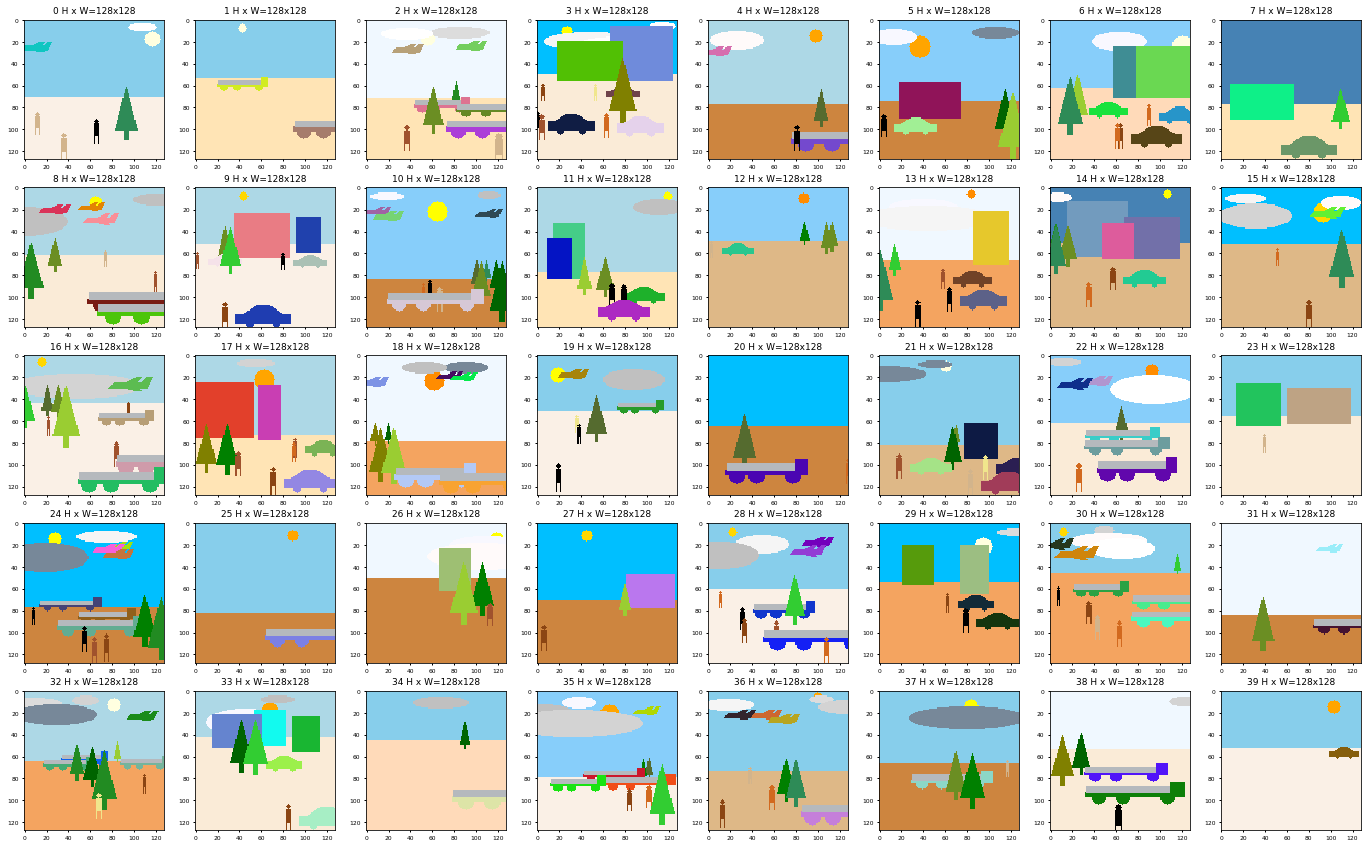

In [9]:
image_list = list(range(0,40))
image_titles = [str(i) for i in image_list]
images = get_image_batch(dataset_test, image_list)
visualize.display_images(images, titles = image_titles, cols = 8, width = 24)

####  Display next image from generator

In [ ]:
train_batch_x, train_batch_y = next(test_generator)

In [ ]:

visualize.display_training_batch(dataset_test, train_batch_x)

#### Load a specific image using image_id

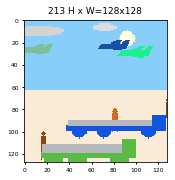

In [7]:
from mrcnn.prep_notebook import run_full_inference_pipeline, run_mrcnn_inference_pipeline
image_list = [213]
image_titles = [str(i) for i in image_list]
images = get_image_batch(dataset_test, image_list)
visualize.display_images(images, titles = image_titles, cols = 8, width = 24)

## Pass image through MRCNN and FCN

In [8]:
fcn_results = run_fcn_detection(fcn_model, mrcnn_model, dataset_test, 213, verbose = 0)  

In [9]:
fcn_results[0].keys()
for i, r in enumerate(fcn_results):
    print('\n output ', i, '  ',sorted(r.keys()))
    for key in sorted(r):
        print(key.ljust(20), r[key].shape)      


 output  0    ['class_ids', 'detection_ind', 'detections', 'fcn_hm', 'fcn_hm_scores', 'fcn_scores', 'fcn_scores_by_class', 'fcn_sm', 'gt_bboxes', 'gt_class_ids', 'image', 'image_meta', 'molded_image', 'molded_rois', 'orig_image_meta', 'pr_hm', 'pr_hm_scores', 'pr_scores', 'pr_scores_by_class', 'rois', 'scores']
class_ids            (11,)
detection_ind        (11,)
detections           (64, 7)
fcn_hm               (128, 128, 9)
fcn_hm_scores        (9, 64, 24)
fcn_scores           (11, 24)
fcn_scores_by_class  (9, 64, 24)
fcn_sm               (128, 128, 9)
gt_bboxes            (11, 4)
gt_class_ids         (11,)
image                (128, 128, 3)
image_meta           (17,)
molded_image         (128, 128, 3)
molded_rois          (11, 4)
orig_image_meta      (17,)
pr_hm                (128, 128, 9)
pr_hm_scores         (9, 64, 24)
pr_scores            (11, 24)
pr_scores_by_class   (9, 64, 24)
rois                 (11, 4)
scores               (11,)


In [10]:
np_format = { 'float' :  lambda x: "%10.4f" % x, 'int'   :  lambda x: "%10d" % x }
np.set_printoptions(linewidth=195, precision=4, floatmode='fixed', threshold =10000, formatter = np_format)

In [11]:
import mrcnn.visualize_2 as vis2
f = fcn_results[0]
vis2.display_pr_fcn_style1(f, class_names, lmt = 17)

         bbox seq id : [        64         63         62         61         60         59         58         57         56         55         53]
  f[class_ids] class : [         8          6          7          3          7          7          8          6          1          1          1]
   f[pr_score] class : [         8          6          7          3          7          7          8          6          1          1          1]
  f[fcn_score] class : [         8          6          7          3          7          7          8          6          1          1          1]
                             truck      cloud   airplane        sun   airplane   airplane      truck      cloud     person     person     person
           TP/FP Ind : [         1          1          1          1          1          1          1          1          1          1          1]
      pr  orig score : [    1.0000     1.0000     1.0000     1.0000     1.0000     1.0000     1.0000     1.0000     0.9996   

In [ ]:
# mrcnn_model.layer_info()
# from mrcnn.prep_notebook import run_pipeline, run_pipeline_on_input
# mrcnn_output, fcn_output, fcn_input = run_pipeline_on_input(mrcnn_model, fcn_model, mrcnn_input, verbose = 0)

model_pr_heatmap                = outputs['mrcnn_output'][0]          # layer:  0   shape: (1, 256, 256, 81)
model_pr_heatmap_scores         = outputs['mrcnn_output'][1]          # layer:  1   shape: (1, 81, 200, 11)
model_gt_heatmap                = outputs['mrcnn_output'][2]          # layer:  2   shape: (1, 256, 256, 81)
model_gt_heatmap_scores         = outputs['mrcnn_output'][3]          # layer:  3   shape: (1, 81, 200, 11)
model_fcn_heatmap               = outputs['fcn_output'][0]          # layer:  0   shape: (1, 256, 256, 81)
model_fcn_softmax               = outputs['fcn_output'][1]          # layer:  1   shape: ()
model_fcn_scores                = outputs['fcn_output'][2]
# model_MSE_loss                  = outputs['fcn_output'][2]          # layer:  1   shape: ()
# model_CE_loss                   = outputs['fcn_output'][3]          # layer:  1   shape: ()
# print('model_pr_heatmap       : ',model_gt_heatmap.shape)
# print('model_pr_heatmap_scores: ',model_gt_heatmap_scores.shape)
# print('model_gt_heatmap       : ',model_gt_heatmap.shape)
# print('model_gt_heatmap_scores: ',model_gt_heatmap_scores.shape)
# print('model_fcn_heatmap      :', model_fcn_heatmap.shape)
# print('model_fcn_softmax      :', model_fcn_softmax.shape)
# print(model_CE_loss,model_MSE_loss)
img_id = 0
print('Image id: ',img_id, ' Coco ID: ', dataset_test.image_info[img_id]['id'])
gt_class_ids = np.unique(model_gt_heatmap_scores[img_id,:,:,4]).astype(int).tolist()
pr_class_ids = np.unique(model_pr_heatmap_scores[img_id,:,:,4]).astype(int).tolist()
print('Image : {}  Ground Truth ClassIds: {}'.format(img_id, gt_class_ids))
print('Image : {}  Predicted    ClassIds: {}'.format(img_id, pr_class_ids))

## Count Class Instances per Image

In [16]:
from mrcnn.utils import trim_zeros, compute_overlaps
from mrcnn.calculate_map import update_map_dictionaries

np_format = { 'float' :  lambda x: "%10.4f" % x, 'int'   :  lambda x: "%10d" % x }
np.set_printoptions(linewidth=195, precision=4, floatmode='fixed', threshold =10000, formatter = np_format)

### Run `compute_ap` over images

In [17]:
import mrcnn.prep_notebook as prep
batch_x = prep.get_evaluate_batch(dataset_test, dataset_test.config, 1, display = False)
batch_x[3]

array([[         3,          6,          6,          4,          4,          5,          5,          0,          0,          0,          0,          0,          0,          0,          0,
                 0,          0,          0,          0,          0,          0,          0,          0,          0,          0,          0,          0,          0,          0,          0,
                 0,          0,          0,          0,          0,          0,          0,          0,          0,          0,          0,          0,          0,          0,          0,
                 0,          0,          0,          0,          0,          0,          0,          0,          0,          0,          0,          0,          0,          0,          0,
                 0,          0,          0,          0,          0,          0,          0,          0,          0,          0,          0,          0,          0,          0,          0,
                 0,          0,          0,          0,     

In [18]:
    # for FILE_IDX in [10]:
    #     FILE_IDX = 10
    #     weights_file = os.path.join(FCN_DIR_WEIGHTS  , fcn_files[FILE_IDX])
    #     print("Loading weights ", weights_file)
    #     fcn_model.load_model_weights(weights_file)
    NUM_CLASSES = 9    ##  (real num of classes + BG)
#     save_path = "E:\\git_projs\\MRCNN3\\train_newshapes2\\other"
#     save_path = '/home/kbardool/models_newshapes2/other'
#     epochs = fcn_files[FILE_IDX].split('_')[1].replace('.h5','')
#     print('Weight file: ', weights_file, ' epochs:', epochs)

#     IMGS = len(dataset_test.image_ids) # 1000
    
    # image_ids = np.random.choice(dataset_test.image_ids, 300)
    image_ids = dataset_test.image_ids
    IMGS = len(image_ids)
    print('Processing ',len(image_ids),' images')

    ###  Initialize data structures 
    r = {}
    agg_hm_shape = (128,128,NUM_CLASSES)
    pr_agg_hm  = np.zeros(agg_hm_shape)
    fcn_agg_hm = np.zeros(agg_hm_shape)
    pr_agg_hm_clipped  = np.zeros(agg_hm_shape)
    fcn_agg_hm_clipped = np.zeros(agg_hm_shape)
    
    gt_cls_counts = np.zeros((NUM_CLASSES), dtype = np.int)
    dt_cls_counts = np.zeros((NUM_CLASSES), dtype = np.int)
    
    gt_ttl_img_by_inst = np.zeros((NUM_CLASSES, 200), dtype = np.int)  # 16 is config.MAX_SHAPES_PER_IMAGE
    dt_ttl_img_by_inst = np.zeros((NUM_CLASSES, 200), dtype = np.int)  # 16 is config.MAX_SHAPES_PER_IMAGE
    
    imgs_one_gt = 0
    imgs_one_dt = 0
    sav_pr_min  = 0
    sav_pr_max  = 0
    sav_fcn_min = 0
    sav_fcn_max = 0
    failed_predicts = 0
    
    for image_id in image_ids:
        # Load image and ground truth data
        if image_id % 1000 == 0:
            print('==> Calculate Heatmap aggregates for image_id : ', image_id)
        batch_x = prep.get_evaluate_batch(dataset_test, dataset_test.config, image_id, display = False)    
        r['gt_class_ids'] = batch_x[3][0]
        gt_inst_per_class = np.bincount(np.abs(r['gt_class_ids']), minlength = NUM_CLASSES)
        gt_cls_counts += gt_inst_per_class
        
        for i in range(NUM_CLASSES):
            gt_ttl_img_by_inst[i,gt_inst_per_class[i]] += 1

        if len(r['gt_class_ids']) == 1:
            imgs_one_gt += 1

#         np.set_printoptions(linewidth=195, precision=4, floatmode='fixed', threshold =10000, formatter = np_format)
#         print('Results for image:')    
#         print('-------------------')
#         print(' # GT objects    :', len(r['gt_class_ids']))
#         print(r['gt_class_ids'])
#         print('gt_inst_per_class \n')
#         print(gt_inst_per_class)
#         print('gt_cls_counts \n')
#         print(gt_cls_counts)
        
        if image_id+1 in [1000,5000,10000, IMGS]:
            heatmaps_file =  'test_dataset_class_info_'+str(image_id+1)+'_imgs.npz'
            print()
            print('Image count: ', image_id+1, '  Save to output file: ',os.path.join(save_path, heatmaps_file))
            np.savez_compressed(os.path.join(save_path, heatmaps_file),     
                            imgs_one_gt   = imgs_one_gt, 
                            imgs_one_dt   = imgs_one_dt,  
                            gt_cls_counts = gt_cls_counts, 
                            dt_cls_counts = dt_cls_counts,
                            gt_ttl_img_by_inst = gt_ttl_img_by_inst,
                            dt_ttl_img_by_inst = dt_ttl_img_by_inst,
                            sav_pr_min    = sav_pr_min  ,
                            sav_pr_max    = sav_pr_max  , 
                            sav_fcn_min   = sav_fcn_min , 
                            sav_fcn_max   = sav_fcn_max ,                     
                            pr_agg_hm     = pr_agg_hm  ,
                            fcn_agg_hm    = fcn_agg_hm  ,
                            pr_agg_hm_clipped  = pr_agg_hm_clipped,
                            fcn_agg_hm_clipped = fcn_agg_hm_clipped )                
            print()
            print('--------------------------------------------------')
            print(' Results at : ', image_id +1, ' processed images  - failed: ', failed_predicts)
            print('--------------------------------------------------')
            print(' pr_hm MIN : {:12.5f}      MAX: {:12.5f}'.format(sav_pr_min, sav_pr_max))
            print(' fcn_hm MIN: {:12.5f}      MAX: {:12.5f}'.format(sav_fcn_min, sav_fcn_max))
            print()
            print(' images with one gt object:', imgs_one_gt, '  one detection from MR-CNN:', imgs_one_dt)
            print(' Ground Truth by class:', gt_cls_counts)
            print(' Detections by class  :', dt_cls_counts)
            print()
            print(' Original Heatmap:')
            print('   pr_hm mins : ',np.min(pr_agg_hm , axis=(0,1)),' maxs: ', np.max(pr_agg_hm , axis=(0,1)))
            print('   fcn_hm mins: ',np.min(fcn_agg_hm, axis=(0,1)),' maxs: ', np.max(fcn_agg_hm, axis=(0,1)))
            print('   pr_hm sums : ',np.sum(pr_agg_hm , axis=(0,1)))
            print('   fcn_hm sums: ',np.sum(fcn_agg_hm , axis=(0,1)))
            print()
            print(' Clipped Heatmap:')
            print('   pr_hm mins : ',np.min(pr_agg_hm_clipped, axis=(0,1)) ,' maxs: ', np.max(pr_agg_hm_clipped, axis=(0,1)))
            print('   fcn_hm mins: ',np.min(fcn_agg_hm_clipped, axis=(0,1)),' maxs: ', np.max(fcn_agg_hm_clipped, axis=(0,1)))
            print('   pr_hm sums : ',np.sum(pr_agg_hm_clipped, axis=(0,1)))
            print('   fcn_hm sums: ',np.sum(fcn_agg_hm_clipped, axis=(0,1)))
            print('\n')
            print('gt_ttl_img_by_inst')
            print(gt_ttl_img_by_inst[34:45,:16])
            print('dt_ttl_img_by_inst')
            print(dt_ttl_img_by_inst[34:45,:16])

    print('\n\n')
#     print('Agg heatmap Calcs completed for epoch:', epochs , ' (Weight file:', weights_file, ')')


Processing  500  images
==> Calculate Heatmap aggregates for image_id :  0

Image count:  500   Save to output file:  /home/kbardool/mrcnn3/train_newshapes_2/other/test_dataset_class_info_500_imgs.npz

--------------------------------------------------
 Results at :  500  processed images  - failed:  0
--------------------------------------------------
 pr_hm MIN :      0.00000      MAX:      0.00000
 fcn_hm MIN:      0.00000      MAX:      0.00000

 images with one gt object: 0   one detection from MR-CNN: 0
 Ground Truth by class: [     45869        836        390        362        381        703        704        361        394]
 Detections by class  : [         0          0          0          0          0          0          0          0          0]

 Original Heatmap:
   pr_hm mins :  [    0.0000     0.0000     0.0000     0.0000     0.0000     0.0000     0.0000     0.0000     0.0000]  maxs:  [    0.0000     0.0000     0.0000     0.0000     0.0000     0.0000     0.0000     0.0000 

## Heatmap aggregation over a number of images

In [10]:
from mrcnn.utils import trim_zeros, compute_overlaps
from mrcnn.calculate_map import update_map_dictionaries

In [11]:
np_format = { 'float' :  lambda x: "%10.4f" % x, 'int'   :  lambda x: "%10d" % x }
np.set_printoptions(linewidth=195, precision=4, floatmode='fixed', threshold =10000, formatter = np_format)

### Load previously saved AP Results from file

In [ ]:
# All_APResults = {}

# path = "E:\\git_projs\\MRCNN3\\train_newshapes\\training_results"
# prev_AP_results_file= 'test_AP_results_2019_01_14'
# with open(os.path.join(path, prev_AP_results_file+'.pkl'), 'rb') as outfile:
#     APRes = pickle.load(outfile)
# All_APResults = APRes

# # print('/'.join(weights_file.split('/')[-3:]))
# print(len(All_APResults.keys()))
# for i in sorted(All_APResults):
#     print(i, All_APResults[i]['Epochs'])

### Load weight file

In [13]:
# FCN_DIR_WEIGHTS =  'F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000' ### Training with LR=0.00001, MSE Loss NO L2 Regularization
FCN_DIR_WEIGHTS =  '/home/kbardool/models_newshapes2/train_fcn8L2_BCE/fcn20190323T0000'
#---------------------------------------------------------------------------------------------
# newshapes2 -  Training with newly designed heatmap layer(adding FPs to the class channels)
#---------------------------------------------------------------------------------------------
fcn_files  = ['fcn_0001.h5', 'fcn_0002.h5', 'fcn_0003.h5', 'fcn_0004.h5', 
              'fcn_0005.h5', 'fcn_0006.h5', 'fcn_0008.h5', 'fcn_0009.h5', 
              'fcn_0012.h5', 'fcn_0016.h5', 'fcn_0018.h5', 'fcn_0019.h5', 
              'fcn_0021.h5', 'fcn_0022.h5', 'fcn_0023.h5', 'fcn_0024.h5', 
              'fcn_0033.h5', 'fcn_0039.h5', 'fcn_0042.h5', 'fcn_0044.h5', 
              'fcn_0077.h5', 'fcn_0089.h5', 'fcn_0170.h5', 'fcn_0177.h5',
              'fcn_0253.h5', 'fcn_0266.h5']  ## 22,23,24,25


FILE_IDX = -1
weights_file = os.path.join(FCN_DIR_WEIGHTS  , fcn_files[FILE_IDX])
print("Loading weights ", weights_file)
fcn_model.load_model_weights(weights_file)

Loading weights  /home/kbardool/models_newshapes2/train_fcn8L2_BCE/fcn20190323T0000/fcn_0266.h5
-----------------------------------------------
 Load Model with init parm: [ /home/kbardool/models_newshapes2/train_fcn8L2_BCE/fcn20190323T0000/fcn_0266.h5 ]
-----------------------------------------------
 ---> Explicit weight file
>>> load_weights() from : /home/kbardool/models_newshapes2/train_fcn8L2_BCE/fcn20190323T0000/fcn_0266.h5
    Weights file loaded: /home/kbardool/models_newshapes2/train_fcn8L2_BCE/fcn20190323T0000/fcn_0266.h5 
FCN  MODEL Load weight file COMPLETE 


### Run `compute_ap` over images

In [15]:
    # for FILE_IDX in [10]:
    #     FILE_IDX = 10
    #     weights_file = os.path.join(FCN_DIR_WEIGHTS  , fcn_files[FILE_IDX])
    #     print("Loading weights ", weights_file)
    #     fcn_model.load_model_weights(weights_file)
    NUM_CLASSES = 9    ##  (real num of classes + BG)
#     save_path = "E:\\git_projs\\MRCNN3\\train_newshapes2\\other"
#     save_path = '/home/kbardool/models_newshapes2/other'
    epochs = fcn_files[FILE_IDX].split('_')[1].replace('.h5','')
    print('Weight file: ', weights_file, ' epochs:', epochs)

    IMGS = len(dataset_test.image_ids) # 1000
#     IMGS = 500
    # image_ids = np.random.choice(dataset_test.image_ids, 300)
    image_ids = dataset_test.image_ids[:IMGS]
    print('Processing ',IMGS,' images')

    ###  Initialize data structures 
    agg_hm_shape = (128,128,NUM_CLASSES)
    pr_agg_hm  = np.zeros(agg_hm_shape)
    fcn_agg_hm = np.zeros(agg_hm_shape)
    pr_agg_hm_clipped  = np.zeros(agg_hm_shape)
    fcn_agg_hm_clipped = np.zeros(agg_hm_shape)
    
    gt_cls_counts = np.zeros((NUM_CLASSES), dtype = np.int)
    dt_cls_counts = np.zeros((NUM_CLASSES), dtype = np.int)
    
    gt_ttl_img_by_inst = np.zeros((NUM_CLASSES, 200), dtype = np.int)  # 16 is config.MAX_SHAPES_PER_IMAGE
    dt_ttl_img_by_inst = np.zeros((NUM_CLASSES, 200), dtype = np.int)  # 16 is config.MAX_SHAPES_PER_IMAGE
    
    imgs_one_gt = 0
    imgs_one_dt = 0
    sav_pr_min  = 0
    sav_pr_max  = 0
    sav_fcn_min = 0
    sav_fcn_max = 0
    failed_predicts = 0
    for image_id in image_ids:
        # Load image and ground truth data
        if image_id % 500 == 0 :
            print('==> Calculate Heatmap aggregates for image_id : ', image_id)
        # Run object detection
        try:
            fcn_results = run_fcn_detection(fcn_model, mrcnn_model, dataset_test, image_id, verbose = 0)  
        except Exception as e :
            print('\n failure on mrcnn predict - image ids: {}'.format(image_id))
            print('\n dataset image info: ' )
            # print('\n Exception information:')
            # print(str(e))
            print(' n continue with next image' )
            failed_predicts += 1
            continue
        else:    
            pass
#             r = fcn_results[0]        
        
        r = fcn_results[0]
        
        gt_inst_per_class = np.bincount(np.abs(r['gt_class_ids']), minlength = NUM_CLASSES)
        dt_inst_per_class = np.bincount(r['class_ids']           , minlength = NUM_CLASSES)
        
        gt_cls_counts += gt_inst_per_class
        dt_cls_counts += dt_inst_per_class
        
        for i in range(NUM_CLASSES):
            gt_ttl_img_by_inst[i,gt_inst_per_class[i]] += 1
            dt_ttl_img_by_inst[i,dt_inst_per_class[i]] += 1
            
            
        if len(r['class_ids']) == 1: 
            imgs_one_dt += 1
        if len(r['gt_class_ids']) == 1:
            imgs_one_gt += 1
            
        pr_hm_clipped   = np.clip(r['pr_hm'], 0.0, 1.0)
        fcn_hm_clipped  = np.clip(r['fcn_hm'], 0.0, 1.0)

        pr_agg_hm          += r['pr_hm']
        fcn_agg_hm         += r['fcn_hm']
        pr_agg_hm_clipped  += np.clip(r['pr_hm'], 0.0, 1.0)
        fcn_agg_hm_clipped += np.clip(r['fcn_hm'], 0.0, 1.0)

        fcn_hm_max = np.max(r['fcn_hm'])
        fcn_hm_min = np.min(r['fcn_hm'])

        pr_hm_max = np.max(r['pr_hm'])
        pr_hm_min = np.min(r['pr_hm'])
        
        if np.isnan(pr_hm_min):
            print(' ===> NaN encountered for pr_hm_min in image: ' , image_id )
        if np.isnan(pr_hm_max):
            print(' ===> NaN encountered for pr_hm_max in image: ' , image_id )

        if fcn_hm_max > sav_fcn_max :
            sav_fcn_max = fcn_hm_max 

        if fcn_hm_min < sav_fcn_min :
            sav_fcn_min = fcn_hm_min 

        if (pr_hm_max > sav_pr_max) and (not np.isnan(pr_hm_max)):
            sav_pr_max = pr_hm_max

        if (pr_hm_min > sav_pr_min) and (not np.isnan(pr_hm_min)):
            sav_pr_min = pr_hm_min


#         np.set_printoptions(linewidth=195, precision=4, floatmode='fixed', threshold =10000, formatter = np_format)
#         print('Results for image:')    
#         print('-------------------')
#         print(' # GT objects    :', len(r['gt_class_ids']))
#         print(r['gt_class_ids'])
#         print('gt_inst_per_class \n')
#         print(gt_inst_per_class)
#         print('gt_cls_counts \n')
#         print(gt_cls_counts)
        
#         print(' # of detections :', len(r['class_ids']))
#         print(r['class_ids'])
#         print('dt_inst_per_class \n')
#         print(dt_inst_per_class)   
#         print('dt_cls_counts \n')
#         print(dt_cls_counts)

#         print('   pr_hm MIN: {:12.5f}      MAX: {:12.5f}'.format(pr_hm_min , pr_hm_max))
#         print('  fcn_hm MIN: {:12.5f}      MAX: {:12.5f}'.format(fcn_hm_min, fcn_hm_max))
#         print(' Original Heatmap:')
#         print('   pr_hm mins : ',np.min(r['pr_hm'], axis=(0,1)) ,' maxs: ', np.max(r['pr_hm'], axis=(0,1)))
#         print('   fcn_hm mins: ',np.min(r['fcn_hm'], axis=(0,1)),' maxs: ', np.max(r['fcn_hm'], axis=(0,1)))
#         print('   pr_hm sums : ',np.sum(r['pr_hm'], axis=(0,1)))
#         print('   fcn_hm sums: ',np.sum(r['fcn_hm'], axis=(0,1)))
#         print()
#         print(' Clipped Heatmap:')
#         print('   pr_hm mins : ',np.min(pr_hm_clipped, axis=(0,1)),' maxs: ', np.max(pr_hm_clipped, axis=(0,1)))
#         print('   fcn_hm mins: ',np.min(fcn_hm_clipped, axis=(0,1))  ,' maxs: ', np.max(fcn_hm_clipped, axis=(0,1)))
#         print('   pr_hm sums : ',np.sum(pr_hm_clipped, axis=(0,1)))
#         print('   fcn_hm sums: ',np.sum(fcn_hm_clipped, axis=(0,1)))


        if image_id+1 in [1000,5000,10000, IMGS]:
            heatmaps_file =  'training_agg_heatmaps_epoch_'+epochs+'_'+str(image_id+1)+'_imgs.npz'
            print()
            print('Image count: ', image_id+1, '  Save to output file: ',os.path.join(save_path, heatmaps_file))
            np.savez_compressed(os.path.join(save_path, heatmaps_file),     
                            imgs_one_gt   = imgs_one_gt, 
                            imgs_one_dt   = imgs_one_dt,  
                            gt_cls_counts = gt_cls_counts, 
                            dt_cls_counts = dt_cls_counts,
                            gt_ttl_img_by_inst = gt_ttl_img_by_inst,
                            dt_ttl_img_by_inst = dt_ttl_img_by_inst,
                            sav_pr_min    = sav_pr_min  ,
                            sav_pr_max    = sav_pr_max  , 
                            sav_fcn_min   = sav_fcn_min , 
                            sav_fcn_max   = sav_fcn_max ,                     
                            pr_agg_hm     = pr_agg_hm  ,
                            fcn_agg_hm    = fcn_agg_hm  ,
                            pr_agg_hm_clipped  = pr_agg_hm_clipped,
                            fcn_agg_hm_clipped = fcn_agg_hm_clipped )                
            print()
            print('--------------------------------------------------')
            print(' Results at : ', image_id +1, ' processed images  - failed: ', failed_predicts)
            print('--------------------------------------------------')
            print(' pr_hm MIN : {:12.5f}      MAX: {:12.5f}'.format(sav_pr_min, sav_pr_max))
            print(' fcn_hm MIN: {:12.5f}      MAX: {:12.5f}'.format(sav_fcn_min, sav_fcn_max))
            print()
            print(' images with one gt object:', imgs_one_gt, '  one detection from MR-CNN:', imgs_one_dt)
            print(' Ground Truth by class:', gt_cls_counts)
            print(' Detections by class  :', dt_cls_counts)
            print()
            print(' Original Heatmap:')
            print('   pr_hm mins : ',np.min(pr_agg_hm , axis=(0,1)),' maxs: ', np.max(pr_agg_hm , axis=(0,1)))
            print('   fcn_hm mins: ',np.min(fcn_agg_hm, axis=(0,1)),' maxs: ', np.max(fcn_agg_hm, axis=(0,1)))
            print('   pr_hm sums : ',np.sum(pr_agg_hm , axis=(0,1)))
            print('   fcn_hm sums: ',np.sum(fcn_agg_hm , axis=(0,1)))
            print()
            print(' Clipped Heatmap:')
            print('   pr_hm mins : ',np.min(pr_agg_hm_clipped, axis=(0,1)) ,' maxs: ', np.max(pr_agg_hm_clipped, axis=(0,1)))
            print('   fcn_hm mins: ',np.min(fcn_agg_hm_clipped, axis=(0,1)),' maxs: ', np.max(fcn_agg_hm_clipped, axis=(0,1)))
            print('   pr_hm sums : ',np.sum(pr_agg_hm_clipped, axis=(0,1)))
            print('   fcn_hm sums: ',np.sum(fcn_agg_hm_clipped, axis=(0,1)))
            print('\n')
            print('gt_ttl_img_by_inst')
            print(gt_ttl_img_by_inst[34:45,:16])
            print('dt_ttl_img_by_inst')
            print(dt_ttl_img_by_inst[34:45,:16])

    print('\n\n')
    print('Agg heatmap Calcs completed for epoch:', epochs , ' (Weight file:', weights_file, ')')


Weight file:  /home/kbardool/models_newshapes2/train_fcn8L2_BCE/fcn20190323T0000/fcn_0266.h5  epochs: 0266
Processing  15000  images
==> Calculate Heatmap aggregates for image_id :  0
==> Calculate Heatmap aggregates for image_id :  500

Image count:  1000   Save to output file:  /home/kbardool/mrcnn3/train_newshapes_2/other/training_agg_heatmaps_epoch_0266_1000_imgs.npz

--------------------------------------------------
 Results at :  1000  processed images  - failed:  0
--------------------------------------------------
 pr_hm MIN :      0.00000      MAX:      1.00000
 fcn_hm MIN:     -4.29885      MAX:      1.77358

 images with one gt object: 0   one detection from MR-CNN: 2
 Ground Truth by class: [   0 1606  687  726  682 1464 1376  742  794]
 Detections by class  : [   0 1590  786  735  813 1597 1758  907 1086]

 Original Heatmap:
   pr_hm mins :  [0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000]  maxs:  [ 0.0000 13.7431 18.0870 12.6874 21.5655 16.6389 42.5479 28

../mrcnn/utils.py:750: RuntimeWarning: invalid value encountered in true_divide
  iou = intersection / union


==> Calculate Heatmap aggregates for image_id :  11500
==> Calculate Heatmap aggregates for image_id :  12000
==> Calculate Heatmap aggregates for image_id :  12500
==> Calculate Heatmap aggregates for image_id :  13000
==> Calculate Heatmap aggregates for image_id :  13500
==> Calculate Heatmap aggregates for image_id :  14000
==> Calculate Heatmap aggregates for image_id :  14500

Image count:  15000   Save to output file:  /home/kbardool/mrcnn3/train_newshapes_2/other/training_agg_heatmaps_epoch_0266_15000_imgs.npz

--------------------------------------------------
 Results at :  15000  processed images  - failed:  1
--------------------------------------------------
 pr_hm MIN :      0.00000      MAX:      1.00000
 fcn_hm MIN:     -4.78072      MAX:      1.81472

 images with one gt object: 10   one detection from MR-CNN: 37
 Ground Truth by class: [    0 23741 11695 10633 11331 21827 21003 10569 11286]
 Detections by class  : [    0 23528 13260 10730 13579 23872 26918 12675 15419

## devleopment of code used above

In [ ]:
print(' Length of results from MRCNN detect: ', len(fcn_results))
r = fcn_results[0]
print('fcn_results keys: ')
print('--------------------')
for i in sorted(r.keys()):
    print('   {:.<25s}  {}'.format(i , r[i].shape))        
print()

In [ ]:
agg_hm_shape = (128,128,7)
pr_agg_hm  = np.zeros(agg_hm_shape)
fcn_agg_hm = np.zeros(agg_hm_shape)
pr_agg_hm_clipped  = np.zeros(agg_hm_shape)
fcn_agg_hm_clipped = np.zeros(agg_hm_shape)
imgs_one_gt = 0
imgs_one_dt = 0
sav_pr_min  = 0
sav_pr_max  = 0
sav_fcn_min = 0
sav_fcn_max = 0

In [ ]:
gt_cls_count = np.zeros((7), dtype = np.int)
dt_cls_count = np.zeros((7), dtype = np.int)
print(r['gt_class_ids'])
print(r['class_ids'])

In [ ]:
gt_cnts = np.bincount(r['gt_class_ids'], minlength = 7)
dt_cnts = np.bincount(r['class_ids'], minlength = 7)
gt_cls_count += gt_cnts
dt_cls_count += dt_cnts
print(gt_cnts)
print(gt_cls_count)
print(dt_cnts)
print(dt_cls_count)

In [ ]:


if len(r['class_ids']) == 1: 
    imgs_one_dt += 1
if len(r['gt_class_ids']) == 1:
    imgs_one_gt  += 1
pr_hm_clipped   = np.clip(r['pr_hm'], 0.0, 1.0)
fcn_hm_clipped  = np.clip(r['fcn_hm'], 0.0, 1.0)

pr_agg_hm          += r['pr_hm']
fcn_agg_hm         += r['fcn_hm']
pr_agg_hm_clipped  += np.clip(r['pr_hm'], 0.0, 1.0)
fcn_agg_hm_clipped += np.clip(r['fcn_hm'], 0.0, 1.0)

fcn_hm_max = np.max(r['fcn_hm'])
fcn_hm_min = np.min(r['fcn_hm'])

pr_hm_max = np.max(r['pr_hm'])
pr_hm_min = np.min(r['pr_hm'])

if fcn_hm_max > sav_fcn_max :
    sav_fcn_max = fcn_hm_max 

if pr_hm_max > sav_pr_max:
    sav_pr_max = pr_hm_max

if fcn_hm_min < sav_fcn_min :
    sav_fcn_min = fcn_hm_min 

if pr_hm_min > sav_pr_min:
    sav_pr_min = pr_hm_min
    
np.set_printoptions(linewidth=195, precision=4, floatmode='fixed', threshold =10000, formatter = np_format)

print('Results for image:')    
print('-------------------')
print(' # GT objects in image    :', len(r['gt_class_ids'])     , '  # of detections :', len(r['class_ids']))
print('   pr_hm MIN: {:12.5f}      MAX: {:12.5f}'.format(pr_hm_min , pr_hm_max))
print('  fcn_hm MIN: {:12.5f}      MAX: {:12.5f}'.format(fcn_hm_min, fcn_hm_max))
print(' Original Heatmap:')
print('   pr_hm mins : ',np.min(r['pr_hm'], axis=(0,1)) ,' maxs: ', np.max(r['pr_hm'], axis=(0,1)))
print('   fcn_hm mins: ',np.min(r['fcn_hm'], axis=(0,1)),' maxs: ', np.max(r['fcn_hm'], axis=(0,1)))
print('   pr_hm sums : ',np.sum(r['pr_hm'], axis=(0,1)))
print('   fcn_hm sums: ',np.sum(r['fcn_hm'], axis=(0,1)))
print()
print(' Clipped Heatmap:')
print('   pr_hm mins : ',np.min(pr_hm_clipped, axis=(0,1)),' maxs: ', np.max(pr_hm_clipped, axis=(0,1)))
print('   fcn_hm mins: ',np.min(fcn_hm_clipped, axis=(0,1))  ,' maxs: ', np.max(fcn_hm_clipped, axis=(0,1)))
print('   pr_hm sums : ',np.sum(pr_hm_clipped, axis=(0,1)))
print('   fcn_hm sums: ',np.sum(fcn_hm_clipped, axis=(0,1)))



print('\n\n')
print(' Final Results:')
print('---------------')
print('  pr_hm MIN: {:12.5f}      MAX: {:12.5f}'.format(sav_pr_min, sav_pr_max))
print(' fcn_hm MIN: {:12.5f}      MAX: {:12.5f}'.format(sav_fcn_min, sav_fcn_max))
print()
print(' images with one gt object:', imgs_one_gt, '  one detection from MR-CNN:', imgs_one_dt)
print()
print(' Original Heatmap:')
print('   pr_hm mins : ',np.min(pr_agg_hm , axis=(0,1)),' maxs: ', np.max(pr_agg_hm , axis=(0,1)))
print('   fcn_hm mins: ',np.min(fcn_agg_hm, axis=(0,1)),' maxs: ', np.max(fcn_agg_hm, axis=(0,1)))
print('   pr_hm sums : ',np.sum(pr_agg_hm , axis=(0,1)))
print('   fcn_hm sums: ',np.sum(fcn_agg_hm , axis=(0,1)))
print()
print(' Clipped Heatmap:')
print('   pr_hm mins : ',np.min(pr_agg_hm_clipped, axis=(0,1)) ,' maxs: ', np.max(pr_agg_hm_clipped, axis=(0,1)))
print('   fcn_hm mins: ',np.min(fcn_agg_hm_clipped, axis=(0,1)),' maxs: ', np.max(fcn_agg_hm_clipped, axis=(0,1)))
print('   pr_hm sums : ',np.sum(pr_agg_hm_clipped, axis=(0,1)))
print('   fcn_hm sums: ',np.sum(fcn_agg_hm_clipped, axis=(0,1)))

###  save heatmaps  and data to .npz file 

In [ ]:
# epochs = files[FILE_IDX].split('_')[1].replace('.h5','')
# heatmaps_file = AP_results_file= 'agg_heatmaps_epoch_'+epochs+'_'+str(IMGS)+'_imgs.npz'
# print(epochs , ' ---> ', heatmaps_file)

# print('  output file: ',os.path.join(save_path, heatmaps_file))

# np.savez_compressed(os.path.join(save_path, heatmaps_file), 
#                 imgs_one_gt   = imgs_one_gt, 
#                 imgs_one_dt   = imgs_one_dt,  
#                 gt_cls_counts = gt_cls_counts, 
#                 dt_cls_counts = dt_cls_counts,
#                 gt_ttl_img_by_inst = gt_ttl_img_by_inst,
#                 dt_ttl_img_by_inst = dt_ttl_img_by_inst,                    
#                 sav_pr_min    = sav_pr_min  ,
#                 sav_pr_max    = sav_pr_max  , 
#                 sav_fcn_min   = sav_fcn_min , 
#                 sav_fcn_max   = sav_fcn_max ,                     
#                 pr_agg_hm     = pr_agg_hm  ,
#                 fcn_agg_hm    = fcn_agg_hm  ,
#                 pr_agg_hm_clipped  = pr_agg_hm_clipped,
#                 fcn_agg_hm_clipped = fcn_agg_hm_clipped )           

### Load and Display saved .npz file 

In [54]:
epochs = files[FILE_IDX].split('_')[1].replace('.h5','')
print(epochs)

heatmaps_file =  'agg_heatmaps_epoch_'+epochs+'_'+str(20)+'_imgs.npz'
print(heatmaps_file)

print('  output file: ',os.path.join(save_path, heatmaps_file))

0821
agg_heatmaps_epoch_0821_20_imgs.npz
  output file:  E:\git_projs\MRCNN3\train_newshapes\average_heatmaps\agg_heatmaps_epoch_0821_20_imgs.npz


In [55]:
loaddata = np.load(os.path.join(save_path, heatmaps_file))

type(loaddata)


l_imgs_one_gt = loaddata['imgs_one_gt']  
l_imgs_one_dt = loaddata['imgs_one_dt']
l_gt_ttl_img_by_inst = loaddata['gt_ttl_img_by_inst'],
l_dt_ttl_img_by_inst = loaddata['dt_ttl_img_by_inst'],
l_sav_pr_min  = loaddata['sav_pr_min'] 
l_sav_pr_max  = loaddata['sav_pr_max']  
l_sav_fcn_min = loaddata['sav_fcn_min']
l_sav_fcn_max = loaddata['sav_fcn_max']
l_pr_agg_hm   = loaddata['pr_agg_hm']
l_fcn_agg_hm  = loaddata['fcn_agg_hm']
l_pr_agg_hm_clipped = loaddata['pr_agg_hm_clipped']
l_fcn_agg_hm_clipped = loaddata['fcn_agg_hm_clipped']


print('  pr_hm MIN: {:12.5f}      MAX: {:12.5f}'.format(l_sav_pr_min, l_sav_pr_max))
print(' fcn_hm MIN: {:12.5f}      MAX: {:12.5f}'.format(l_sav_fcn_min, l_sav_fcn_max))
print()
print(' images with one gt object:', l_imgs_one_gt, '  one detection from MR-CNN:', l_imgs_one_dt)
print()
print(' Original Heatmap:')
print('   pr_hm mins : ',np.min(l_pr_agg_hm , axis=(0,1)),' maxs: ', np.max(l_pr_agg_hm , axis=(0,1)))
print('   fcn_hm mins: ',np.min(l_fcn_agg_hm, axis=(0,1)),' maxs: ', np.max(l_fcn_agg_hm, axis=(0,1)))
print('   pr_hm sums : ',np.sum(l_pr_agg_hm , axis=(0,1)))
print('   fcn_hm sums: ',np.sum(l_fcn_agg_hm , axis=(0,1)))
print()
print(' Clipped Heatmap:')
print('   pr_hm mins : ',np.min(l_pr_agg_hm_clipped, axis=(0,1)) ,' maxs: ', np.max(l_pr_agg_hm_clipped, axis=(0,1)))
print('   fcn_hm mins: ',np.min(l_fcn_agg_hm_clipped, axis=(0,1)),' maxs: ', np.max(l_fcn_agg_hm_clipped, axis=(0,1)))
print('   pr_hm sums : ',np.sum(l_pr_agg_hm_clipped, axis=(0,1)))
print('   fcn_hm sums: ',np.sum(l_fcn_agg_hm_clipped, axis=(0,1)))

  pr_hm MIN:      0.00000      MAX:      1.00000
 fcn_hm MIN:     -3.56792      MAX:      1.18562

 images with one gt object: 2   one detection from MR-CNN: 2

 Original Heatmap:
   pr_hm mins :  [0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000]  maxs:  [0.0000 1.8770 2.3233 2.0810 2.6800 1.7789 3.5330]
   fcn_hm mins:  [ -0.0001 -25.1418 -14.9241 -23.9941 -12.7741 -23.3497 -18.0801]  maxs:  [ 0.0001 -0.7623  0.2094 -1.0247  0.3314 -0.3817  2.5551]
   pr_hm sums :  [   0.0000  438.3976 1092.1847  332.0509 1660.9972  675.0004 1019.0927]
   fcn_hm sums:  [     -0.0084 -124706.8728  -81722.7683 -136344.3595  -81049.0407 -128318.6379  -81012.0410]

 Clipped Heatmap:
   pr_hm mins :  [0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000]  maxs:  [0.0000 1.8770 2.3233 2.0810 2.6800 1.7789 3.5330]
   fcn_hm mins:  [0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000]  maxs:  [0.0001 1.0298 2.2760 1.6191 2.8744 2.1363 4.0747]
   pr_hm sums :  [   0.0000  438.3976 1092.1847  332.0509 1660.9972  675.

## Load and display Heatmaps

In [12]:
np_format = {}
np_format['float']  = lambda x: "%15.4f" % x
np_format['int']    = lambda x: "%8d" % x
np.set_printoptions(linewidth=195, precision=4, floatmode='fixed', threshold =10000, formatter = np_format)

#### Agg heatmaps file

In [64]:
# epochs = files[FILE_IDX].split('_')[1].replace('.h5','')
epochs = '0266'
count  = '500'
print(epochs, count)
mode = 'test'
heatmaps_file =  mode+'_agg_heatmaps_epoch_'+epochs+'_'+count+'_imgs.npz'
heatmaps_path = '/home/kbardool/mrcnn3/train_newshapes_2/average_heatmaps/'
print(heatmaps_file)
print('  input file: ',os.path.join(heatmaps_path, heatmaps_file))
loaddata = np.load(os.path.join(heatmaps_path, heatmaps_file))
# heatmaps_file =  'training_dataset_class_info_15000_imgs.npz'
# heatmaps_file =  'test_dataset_class_info_500_imgs.npz'
# print(heatmaps_file)
# loaddata = np.load(os.path.join('/home/kbardool/mrcnn3/train_newshapes_2/other/', heatmaps_file))

0266 500
test_agg_heatmaps_epoch_0266_500_imgs.npz
  input file:  /home/kbardool/mrcnn3/train_newshapes_2/average_heatmaps/test_agg_heatmaps_epoch_0266_500_imgs.npz


#### Class count file

In [38]:
# epochs = files[FILE_IDX].split('_')[1].replace('.h5','')
epochs = '0266'
count  = '500'
print(epochs, count)
# heatmaps_file =  'agg_heatmaps_epoch_'+epochs+'_'+count+'_imgs.npz'
print(heatmaps_file)
# loaddata = np.load(os.path.join('/home/kbardool/mrcnn3/train_newshapes_2/average_heatmaps/', heatmaps_file))
# heatmaps_file =  'training_dataset_class_info_15000_imgs.npz'
heatmaps_file =  'test_dataset_class_info_500_imgs.npz'
heatmaps_path = '/home/kbardool/mrcnn3/train_newshapes_2/average_heatmaps/'
print(heatmaps_file)
print('  input file: ',os.path.join(heatmaps_path, heatmaps_file))
loaddata = np.load(os.path.join(heatmaps_path, heatmaps_file))

0266 500
agg_heatmaps_epoch_0266_500_imgs.npz
  input file:  /home/kbardool/mrcnn3/train_newshapes_2/average_heatmaps/agg_heatmaps_epoch_0266_500_imgs.npz
  input file:  /home/kbardool/mrcnn3/train_newshapes_2/other/agg_heatmaps_epoch_0266_500_imgs.npz
test_dataset_class_info_500_imgs.npz


#### display contents of loaded file

In [65]:
#     os.path.join(save_path, heatmaps_file))

print(type(loaddata))
print(type(loaddata['gt_ttl_img_by_inst']),'  ', type(loaddata['gt_ttl_img_by_inst'][0]))
gt_cls_counts = loaddata['gt_cls_counts']  
dt_cls_counts = loaddata['dt_cls_counts']  
imgs_one_gt   = loaddata['imgs_one_gt']  
imgs_one_dt   = loaddata['imgs_one_dt'] 
gt_ttl_img_by_inst = loaddata['gt_ttl_img_by_inst']
dt_ttl_img_by_inst = loaddata['dt_ttl_img_by_inst']

sav_pr_min    = loaddata['sav_pr_min'] 
sav_pr_max    = loaddata['sav_pr_max']  
sav_fcn_min   = loaddata['sav_fcn_min']
sav_fcn_max   = loaddata['sav_fcn_max']
pr_agg_hm     = loaddata['pr_agg_hm']
fcn_agg_hm    = loaddata['fcn_agg_hm']
pr_agg_hm_clipped = loaddata['pr_agg_hm_clipped']
fcn_agg_hm_clipped = loaddata['fcn_agg_hm_clipped']

   
print('\n\n')
print('Agg heatmap Calcs complete for epoch:', epochs , ' (heatmap file:', heatmaps_file, ')')
print('\n\n')
print(' Final Results:')
print('---------------')
print(' images with one gt object:', imgs_one_gt, '  one detection from MR-CNN:', imgs_one_dt)
print(' Ground Truth by class:', gt_cls_counts)
print(' Detections by class  :', dt_cls_counts)
print()
print('  pr_hm MIN: {:12.5f}      MAX: {:12.5f}'.format(sav_pr_min, sav_pr_max))
print(' fcn_hm MIN: {:12.5f}      MAX: {:12.5f}'.format(sav_fcn_min, sav_fcn_max))
print()
print(' Original Heatmap:')
print('    pr_agg_hm mins: ',np.min(pr_agg_hm , axis=(0,1)))
print('              maxs: ',np.max(pr_agg_hm , axis=(0,1)))
print()
print('   fcn_agg_hm mins: ',np.min(fcn_agg_hm, axis=(0,1)))
print('              maxs: ',np.max(fcn_agg_hm, axis=(0,1)))
print()
print('   pr_agg_hm sums : ',np.sum(pr_agg_hm , axis=(0,1)))
print('  fcn_agg_hm sums : ',np.sum(fcn_agg_hm, axis=(0,1)))
print()
print(' Clipped Heatmap:')
print('  pr clipped mins : ',np.min(pr_agg_hm_clipped, axis=(0,1)))
print('             maxs : ',np.max(pr_agg_hm_clipped, axis=(0,1)))
print()
print(' fcn clipped mins : ',np.min(fcn_agg_hm_clipped, axis=(0,1)))
print('             maxs : ', np.max(fcn_agg_hm_clipped, axis=(0,1)))
print()
print('  pr clipped sums : ',np.sum(pr_agg_hm_clipped, axis=(0,1)))
print('  cn clipped sums : ',np.sum(fcn_agg_hm_clipped, axis=(0,1)))

print('\n gt_ttl_img_by_inst', type(gt_ttl_img_by_inst))
print(' ------------------')
print(gt_ttl_img_by_inst[:,:10])
print('\n dt_ttl_img_by_inst')
print(' ------------------')
print(dt_ttl_img_by_inst[:,:10])

<class 'numpy.lib.npyio.NpzFile'>
<class 'numpy.ndarray'>    <class 'numpy.ndarray'>



Agg heatmap Calcs complete for epoch: 0266  (heatmap file: test_agg_heatmaps_epoch_0266_500_imgs.npz )



 Final Results:
---------------
 images with one gt object: 0   one detection from MR-CNN: 0
 Ground Truth by class: [       0      836      390      362      381      703      704      361      394]
 Detections by class  : [       0      812      392      359      372      699      701      363      384]

  pr_hm MIN:      0.00000      MAX:      1.00000
 fcn_hm MIN:     -4.38655      MAX:      1.65317

 Original Heatmap:
    pr_agg_hm mins:  [         0.0000          0.0000          0.0000          0.0000          0.0000          0.0000          0.0000          0.0000          0.0000]
              maxs:  [         0.0000         10.2198         10.6267          8.3303         14.3924         10.2839         24.2236         14.2951         15.7179]

   fcn_agg_hm mins:  [        -0.0000       -

In [77]:
#  print(gt_ttl_img_by_inst.shape)
# fig, fig2 = vis2.display_pairwise_heatmap_rotated(gt_ttl_img_by_inst[:,:7], CLASS_IDS, CLASS_NAMES,start_from = 1)

In [37]:

# filename1 = os.path.join(save_path , 'nshapes2_training_file_instance_distribution.png')
# filename2 = os.path.join(save_path , 'nshapes2_training_file_class_distribution.png')

# print(filename1)
# fig.savefig(filename1)
# print(filename2)
# fig2.savefig(filename2)

/home/kbardool/mrcnn3/train_newshapes_2/other/nshapes2_training_file_instance_distribution.png
/home/kbardool/mrcnn3/train_newshapes_2/other/nshapes2_training_file_class_distribution.png


## Display Heatmaps

In [3]:
# def deprocess_image(x):
#     # normalize tensor: center on 0., ensure std is 0.1
#     x -= x.mean()
#     x /= (x.std() + 1e-5)
#     x *= 0.1

#     # clip to [0, 1]
#     x += 0.5
#     x = np.clip(x, 0, 1)

#     # convert to RGB array
#     x *= 255
#     x = np.clip(x, 0, 255).astype('uint8')
#     return x

(9, 200)
 -- matrix shape:  (8, 10)
summshape :  (1, 8)


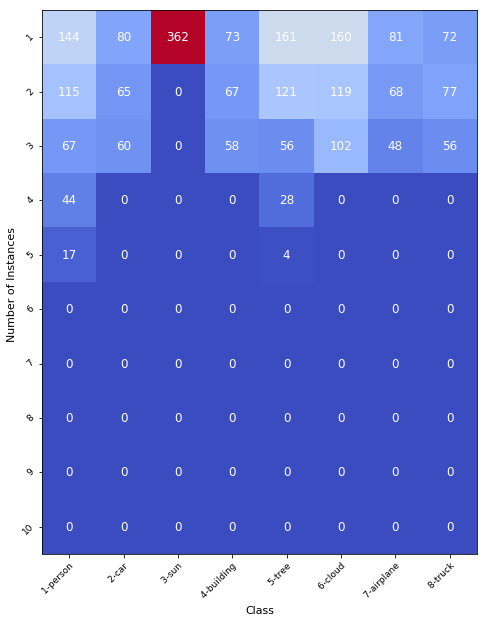

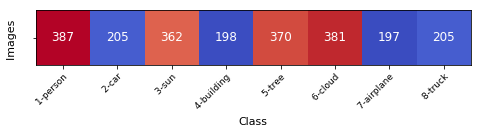

In [66]:
print(gt_ttl_img_by_inst.shape)
hmfig = vis2.display_pairwise_heatmap_rotated(gt_ttl_img_by_inst[:,:11], CLASS_IDS, CLASS_NAMES)

### mask_rcnn output

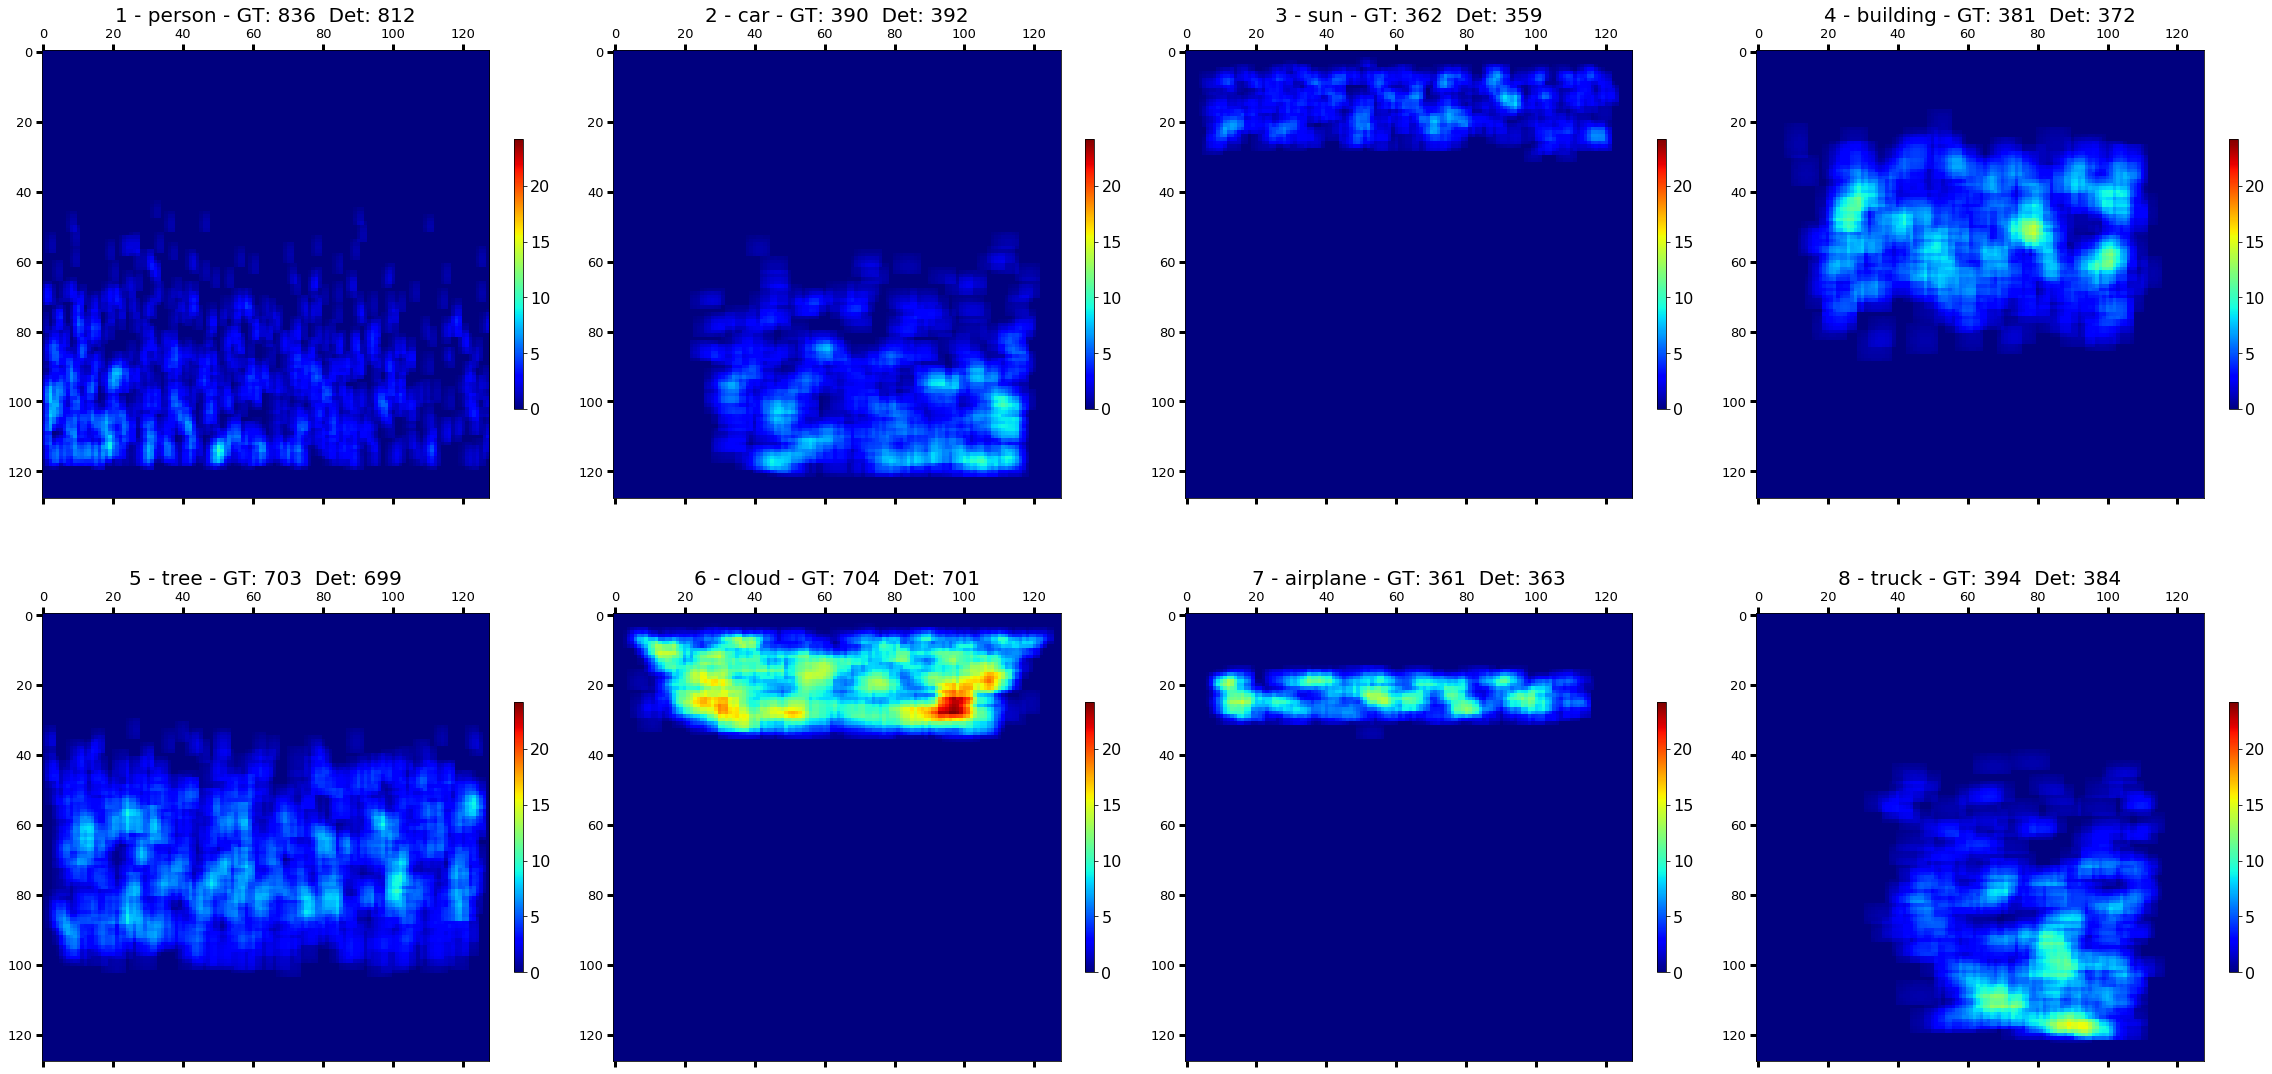

In [68]:
fig = vis2.display_fcn_agg_heatmaps(pr_agg_hm, gt_cls_counts, dt_cls_counts, CLASS_NAMES, CLASS_IDS, cmap = 'jet', 
                                    columns = 4) ## , title = 'rcnn heatmaps - NOT clipped ')

In [69]:
weights_histogram = os.path.join(save_path , 'ns2_'+mode+'_hm_MRCNN_raw.png')
print(weights_histogram)
fig.savefig(weights_histogram)

/home/kbardool/mrcnn3/train_newshapes_2/other/ns2_test_hm_MRCNN_raw.png


(128, 128, 9)


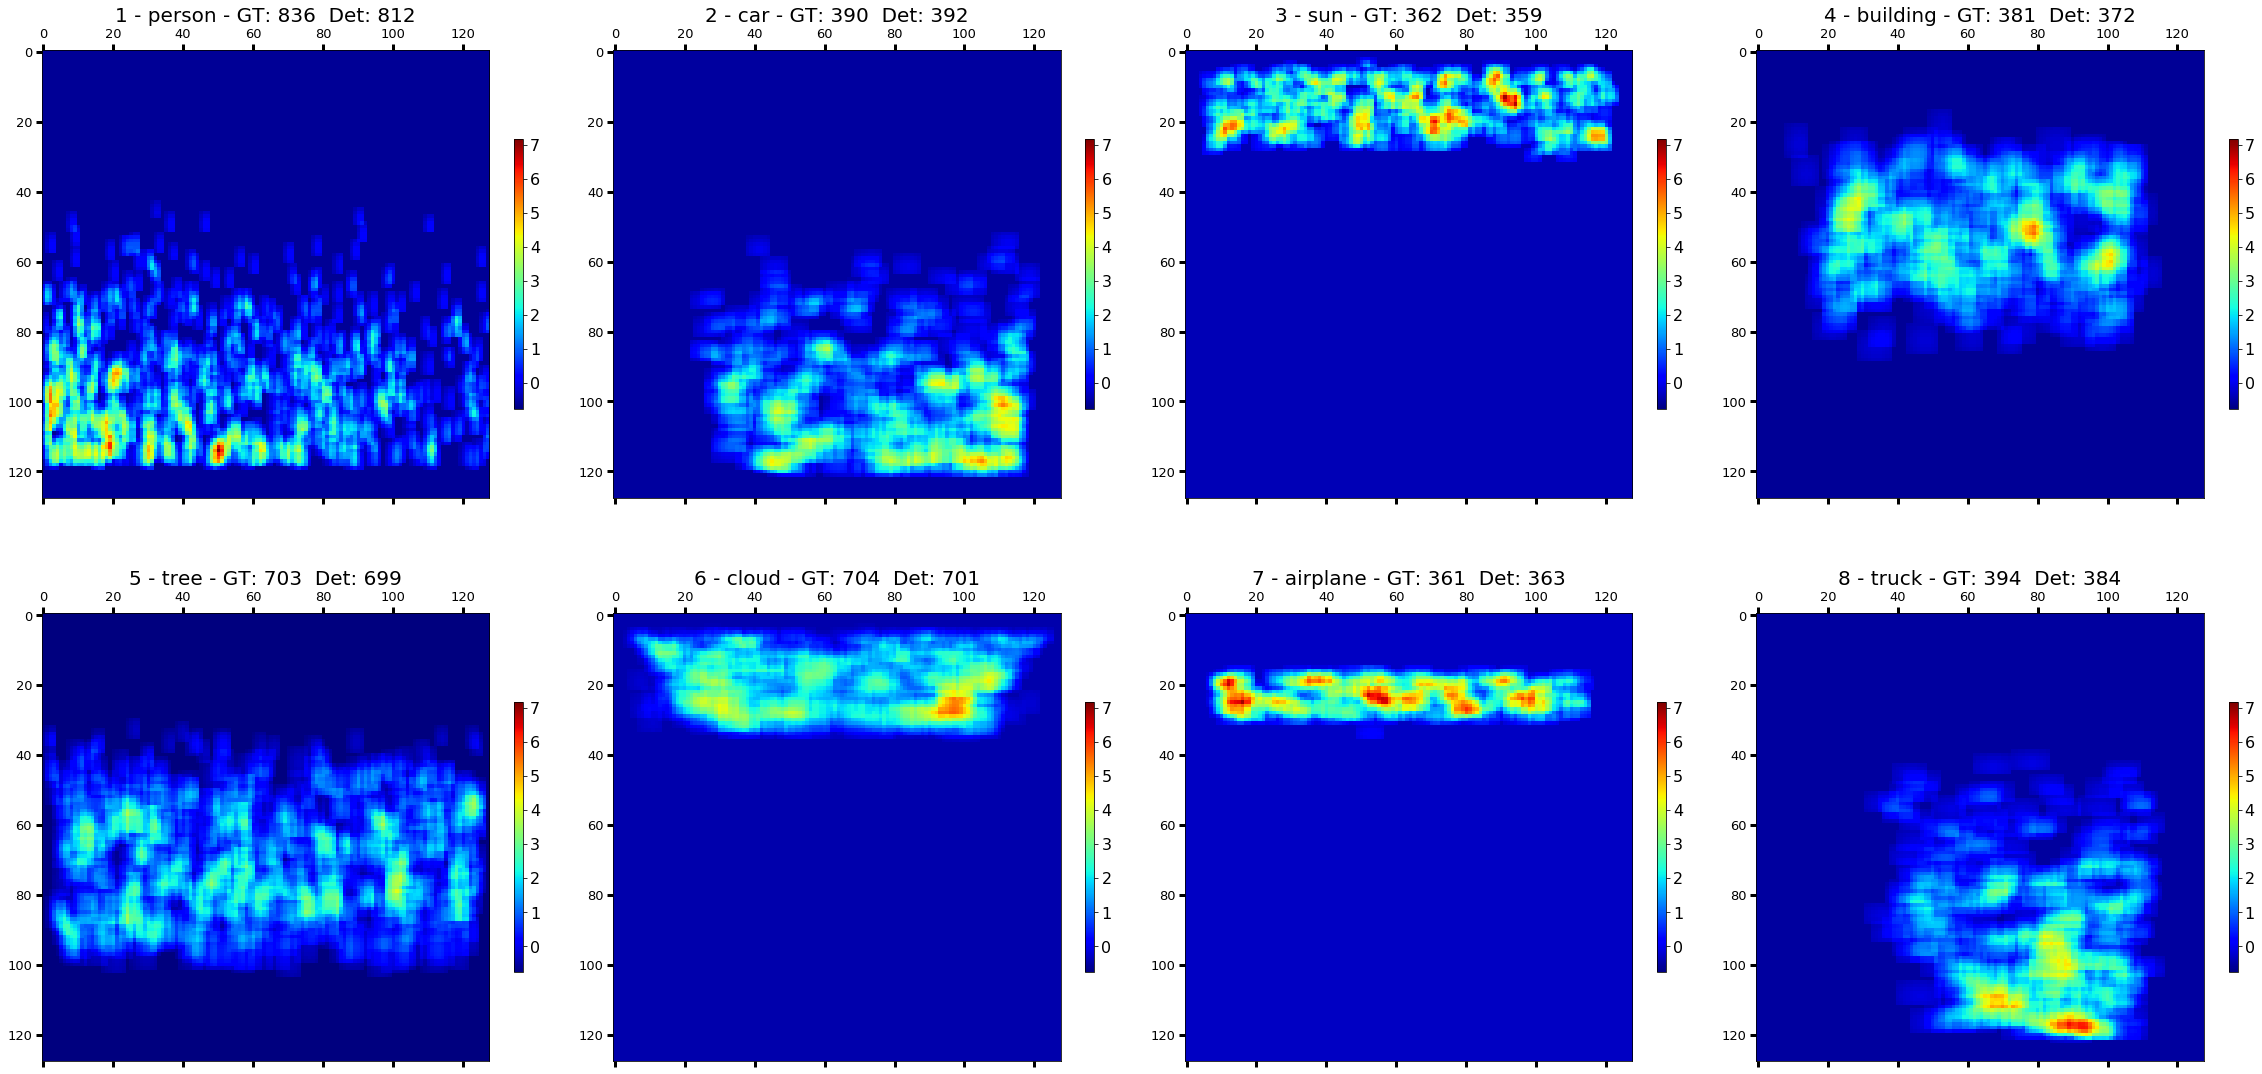

In [70]:
fig = vis2.display_fcn_agg_heatmaps(vis2.standardize_fcn_hm(pr_agg_hm), gt_cls_counts, dt_cls_counts,  CLASS_NAMES, CLASS_IDS, cmap = 'jet', 
                                    columns = 4) ## title = 'rcnn heatmaps - NOT Clipped - Normalized - ')

In [72]:
weights_histogram = os.path.join(save_path , 'ns2_'+mode+'_hm_MRCNN_raw_standardized.png')
print(weights_histogram)
fig.savefig(weights_histogram)

/home/kbardool/mrcnn3/train_newshapes_2/other/ns2_test_hm_MRCNN_raw_standardized.png


###  mask_rcnn clipped  (same as mask_rcnn output)

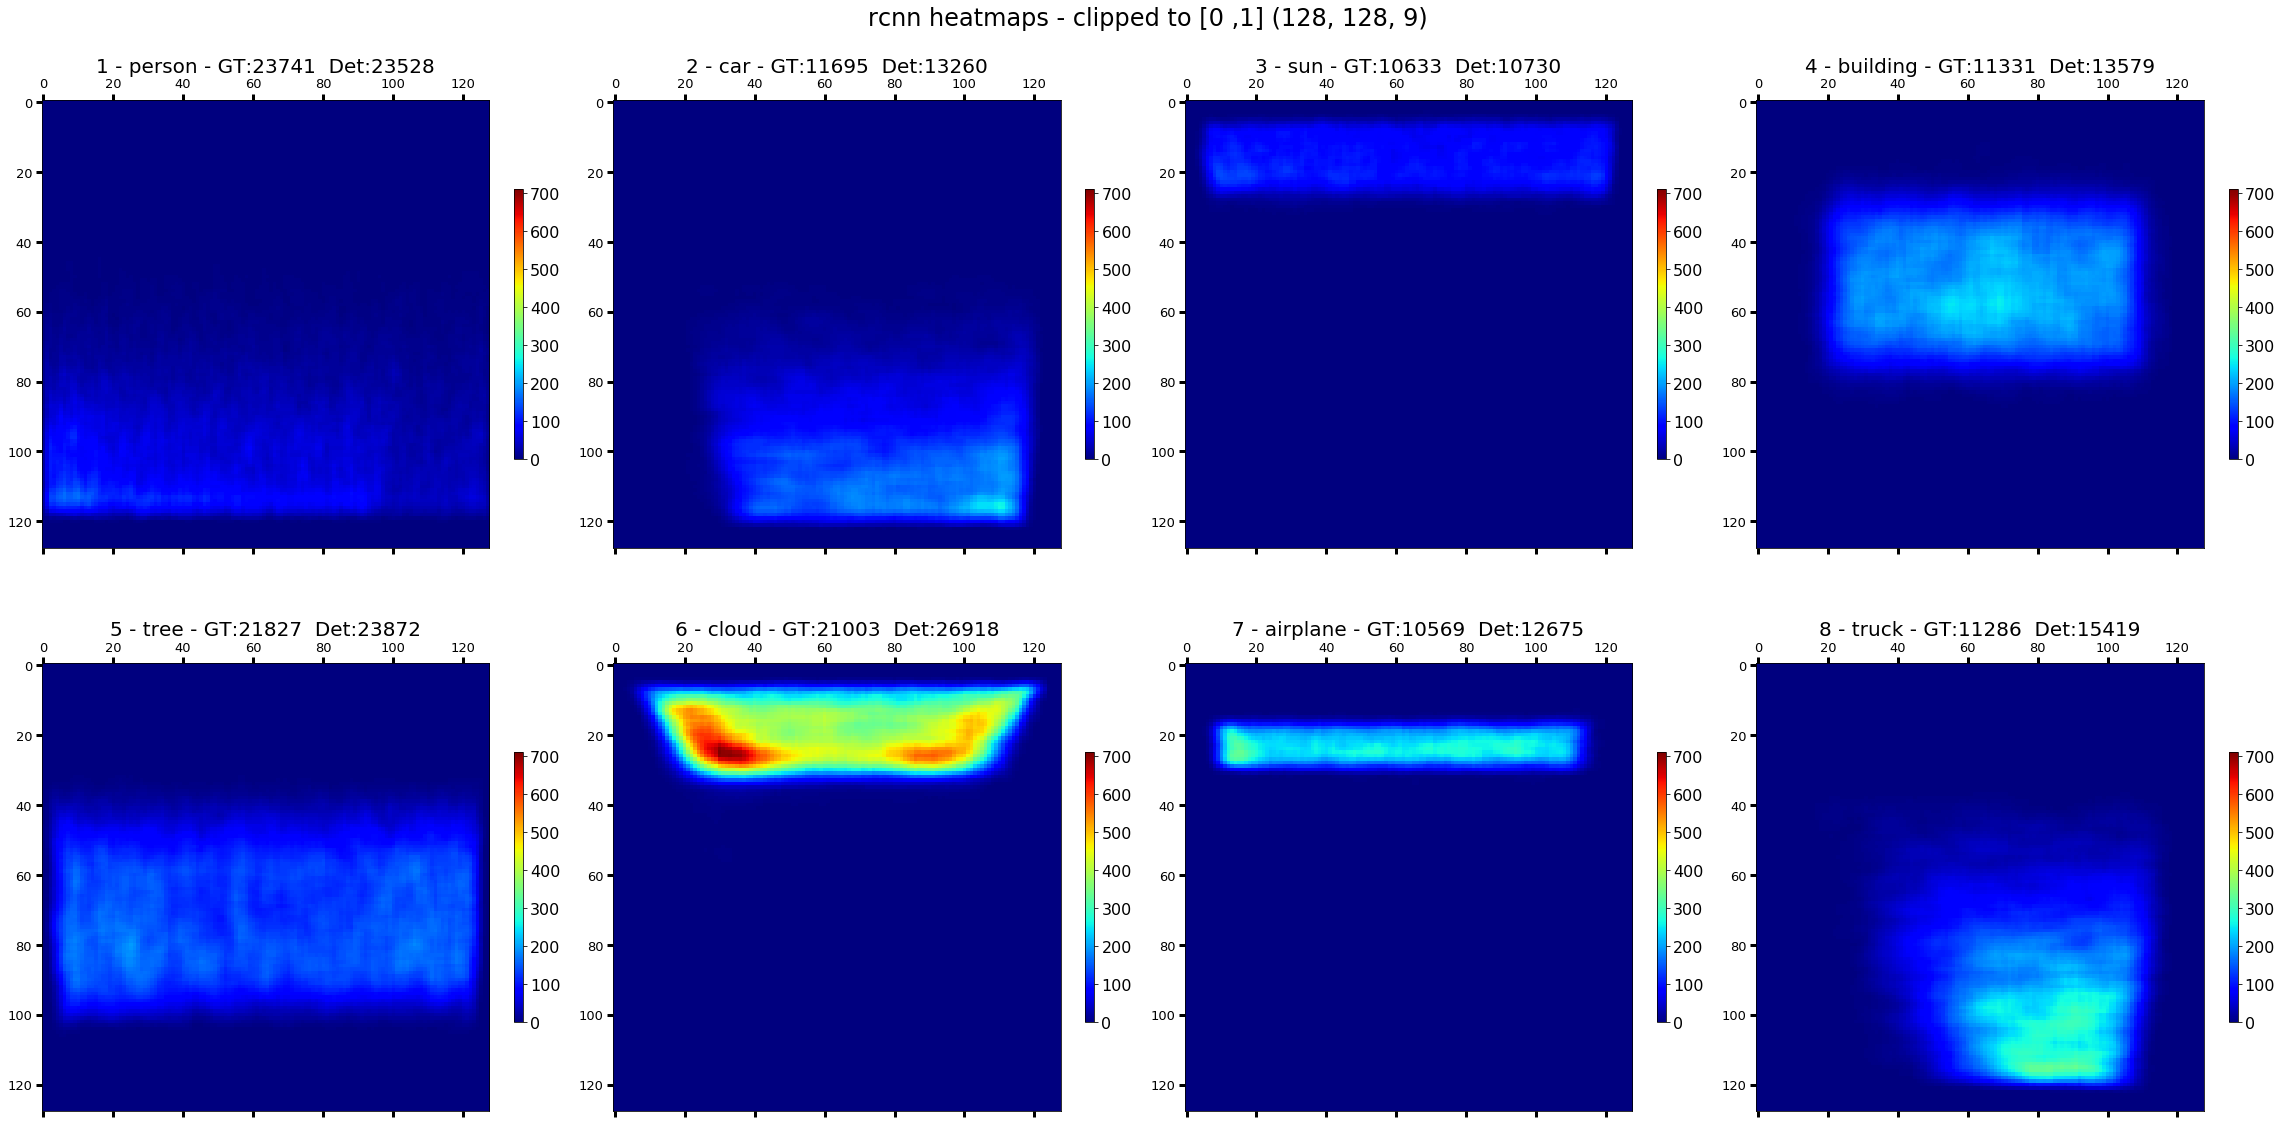

In [52]:
# vis2.display_fcn_agg_heatmaps(pr_agg_hm_clipped, gt_cls_counts, dt_cls_counts, cmap = 'jet', columns = 8, title = 'rcnn heatmaps - clipped to [0 ,1]')
fig = vis2.display_fcn_agg_heatmaps(pr_agg_hm_clipped, gt_cls_counts, dt_cls_counts, CLASS_NAMES, CLASS_IDS, cmap = 'jet', 
                                    columns = 4, title = 'rcnn heatmaps - clipped to [0 ,1]')

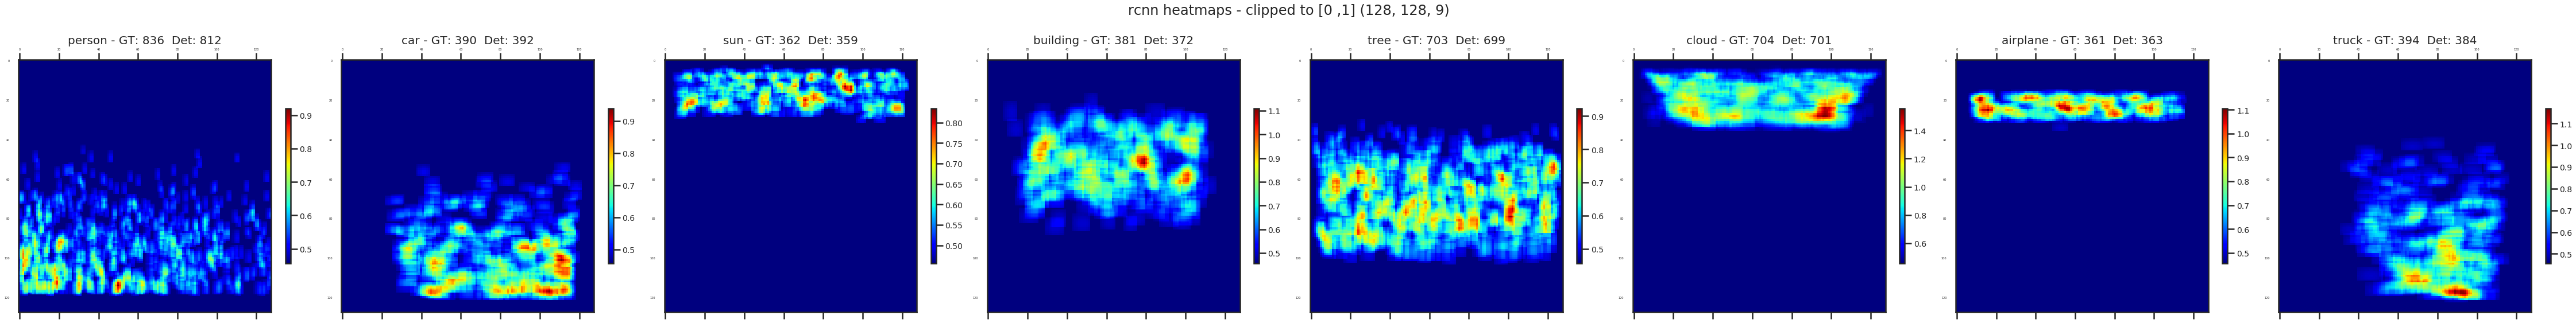

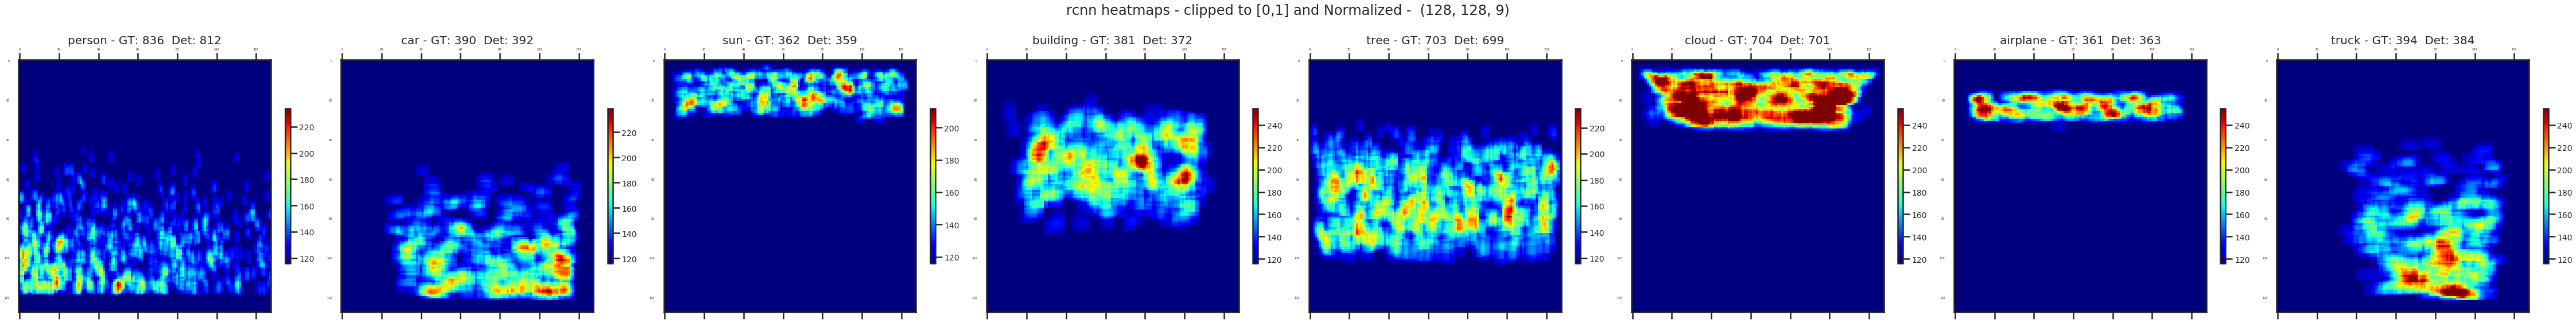

In [33]:
display_fcn_input(deprocess_image(pr_agg_hm_clipped), gt_cls_counts, dt_cls_counts, cmap = 'jet', columns = 8, title = 'rcnn heatmaps - clipped to [0,1] and Normalized - ')

###  fcn

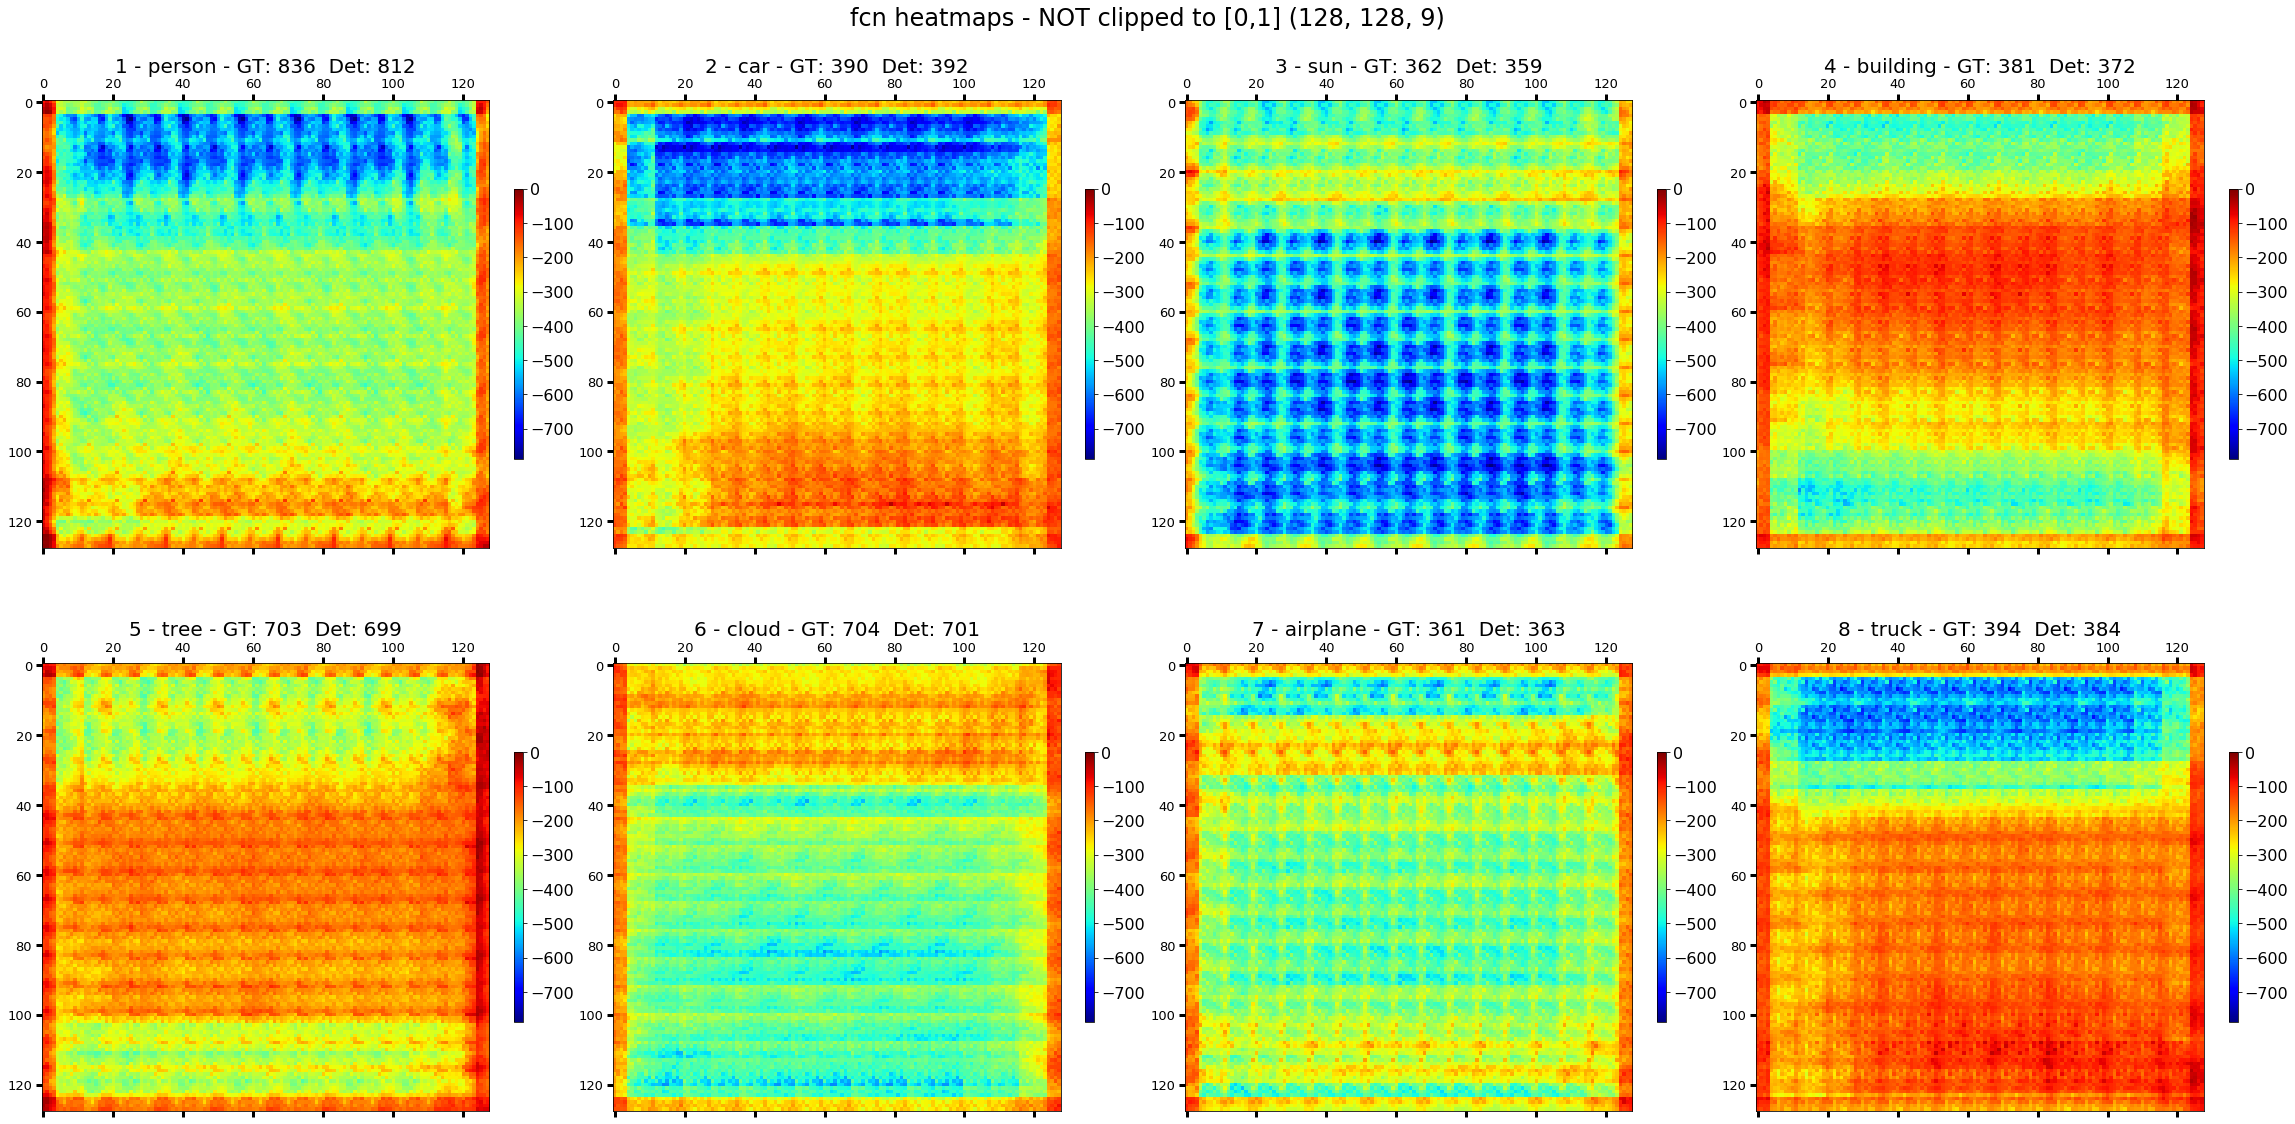

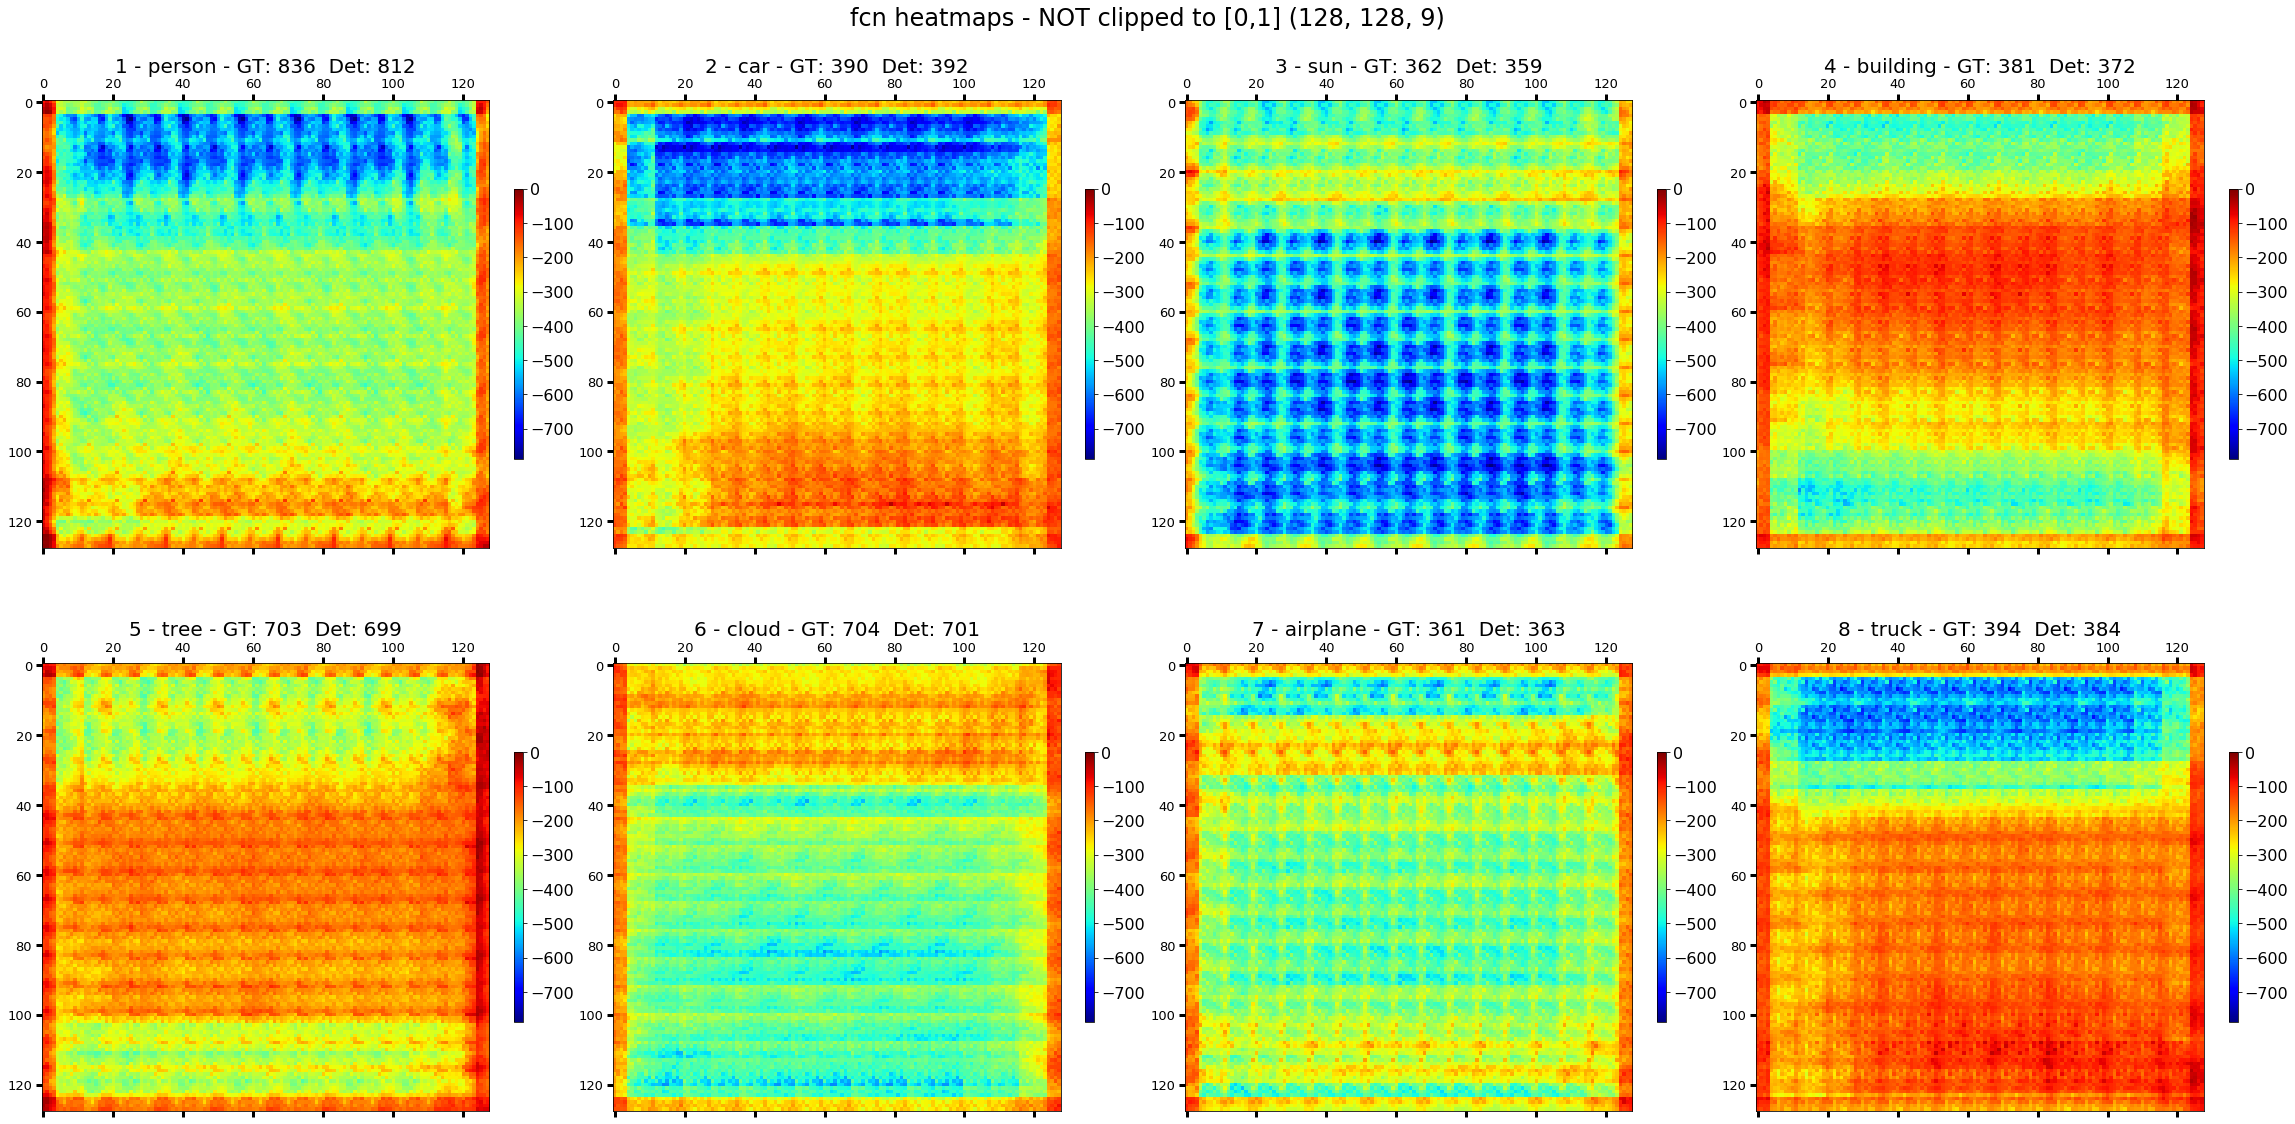

In [73]:
vis2.display_fcn_agg_heatmaps(fcn_agg_hm, gt_cls_counts, dt_cls_counts,   CLASS_NAMES, CLASS_IDS, cmap = 'jet', columns =4, title = 'fcn heatmaps - NOT clipped to [0,1]')

In [74]:
weights_histogram = os.path.join(save_path , 'ns2_'+mode+'_hm_FCN_raw.png')
print(weights_histogram)
fig.savefig(weights_histogram)

/home/kbardool/mrcnn3/train_newshapes_2/other/ns2_test_hm_FCN_raw.png


### fcn normalized

(128, 128, 9)


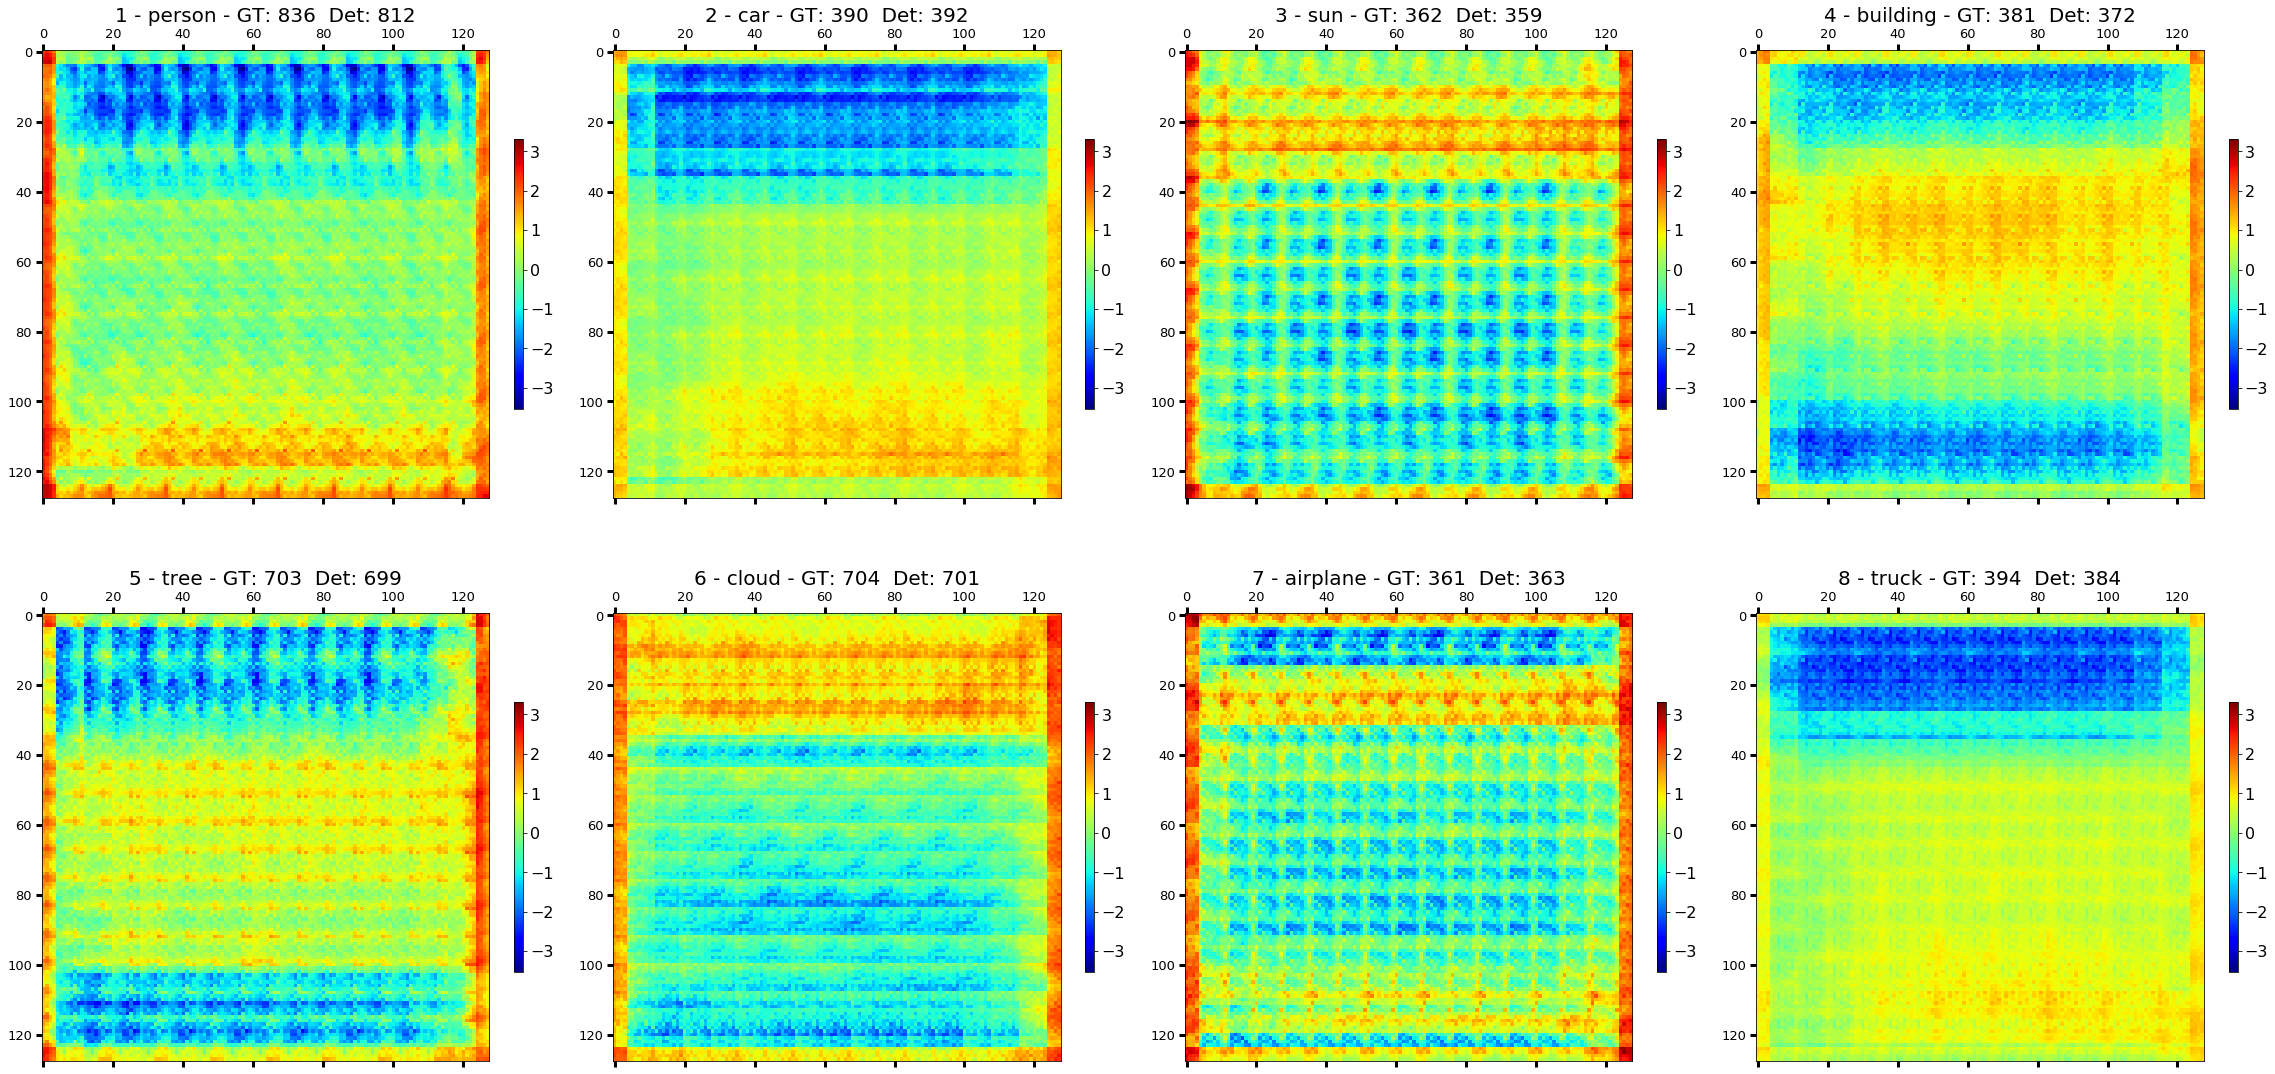

In [75]:
fig= vis2.display_fcn_agg_heatmaps(vis2.standardize_fcn_hm(fcn_agg_hm), gt_cls_counts, dt_cls_counts,   CLASS_NAMES, CLASS_IDS, cmap = 'jet',
                  columns = 4) ##, title = 'fcn heatmaps - NOT clipped to [0,1],  Normalized -')

In [76]:
weights_histogram = os.path.join(save_path , 'ns2_'+mode+'_hm_FCN_raw_standardized.png')
print(weights_histogram)
fig.savefig(weights_histogram)

/home/kbardool/mrcnn3/train_newshapes_2/other/ns2_test_hm_FCN_raw_standardized.png


### fcn clipped

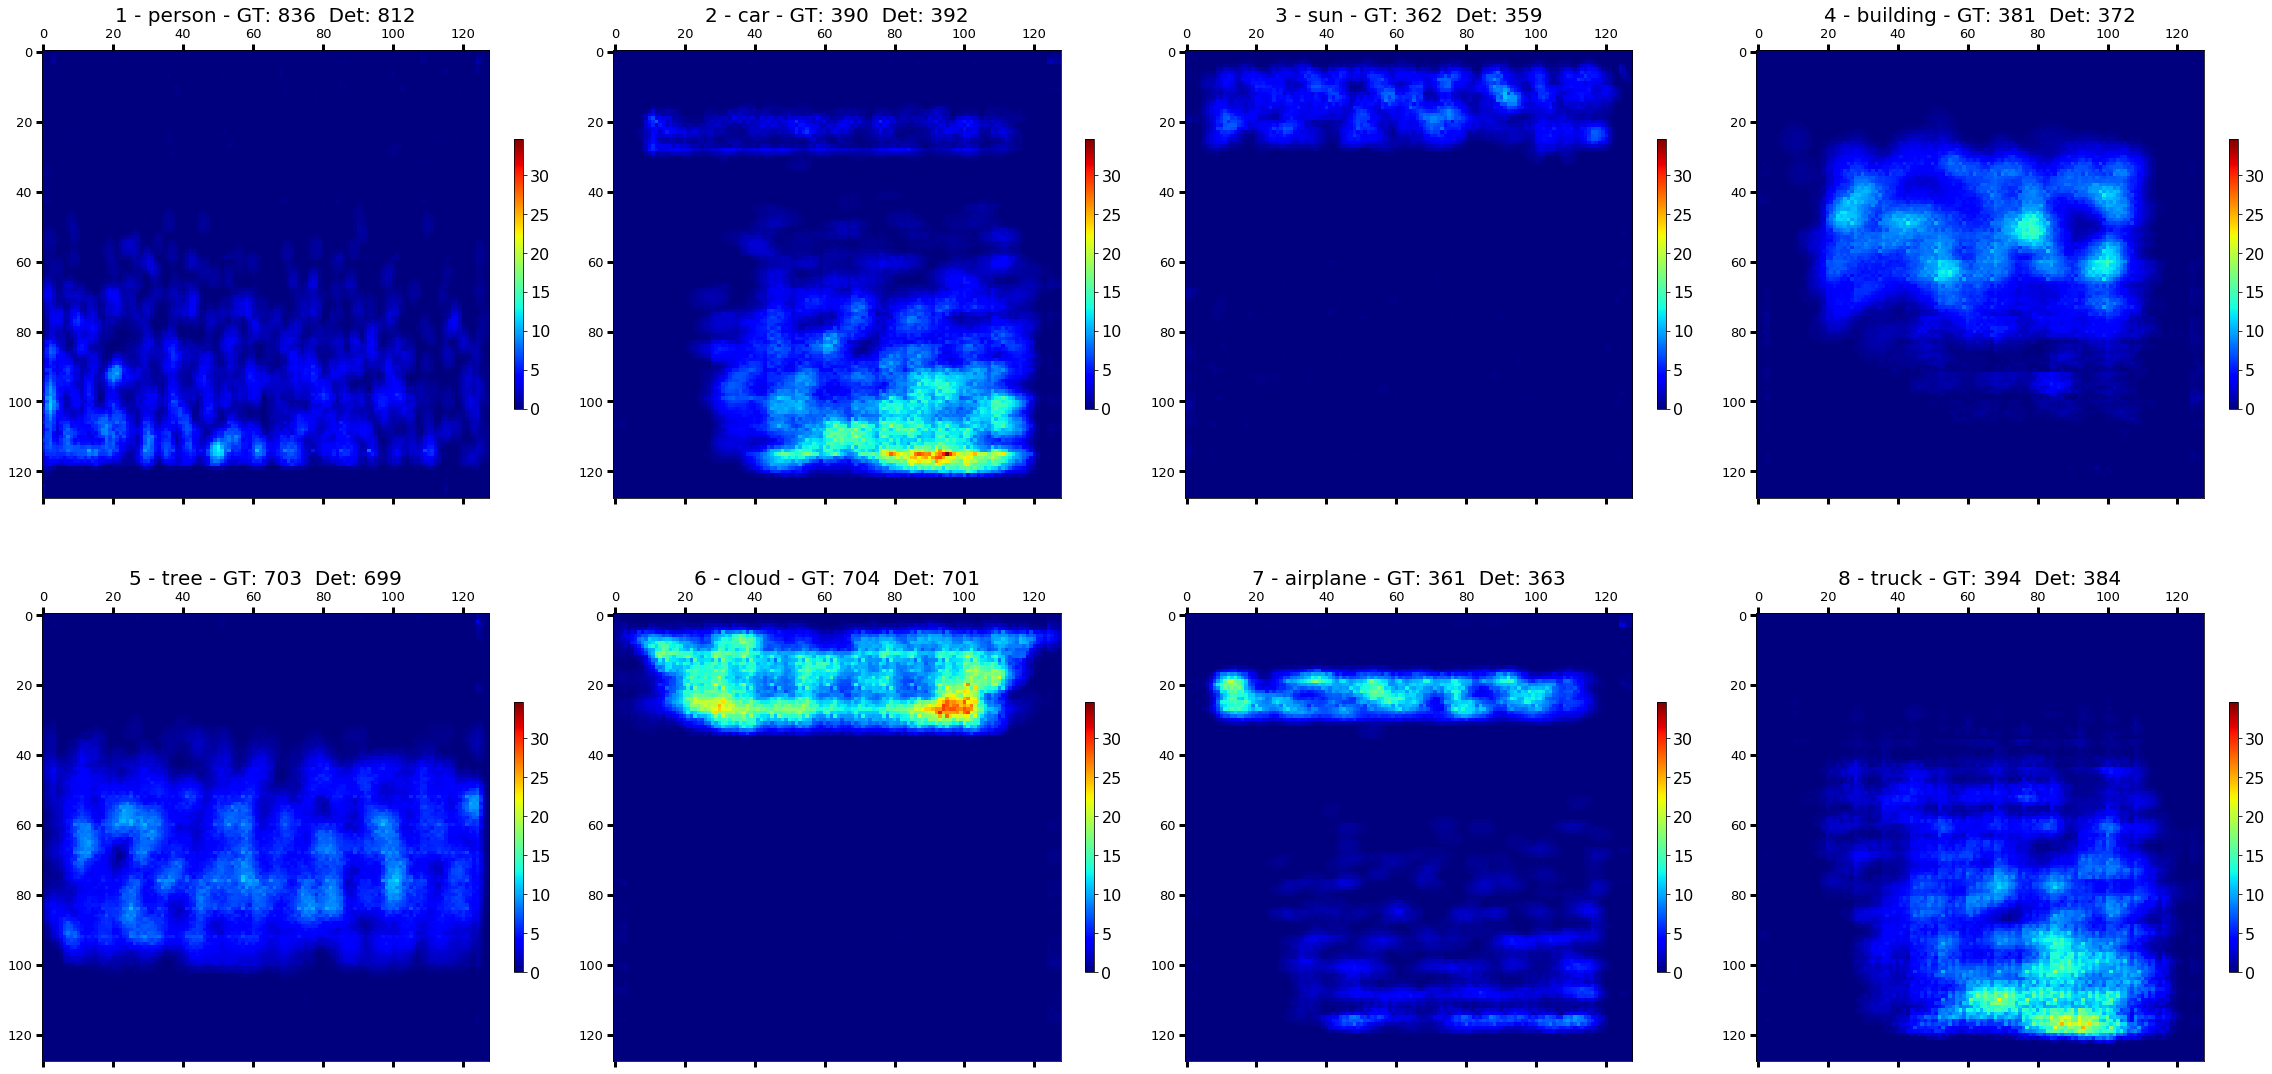

In [77]:
fig= vis2.display_fcn_agg_heatmaps(fcn_agg_hm_clipped, gt_cls_counts, dt_cls_counts,   CLASS_NAMES, CLASS_IDS, cmap = 'jet',
                                   columns = 4) ## title = 'fcn heatmaps - clipped to [0,1] - ')

In [78]:
weights_histogram = os.path.join(save_path , 'ns2_'+mode+'_hm_FCN_clipped.png')
print(weights_histogram)
fig.savefig(weights_histogram)

/home/kbardool/mrcnn3/train_newshapes_2/other/ns2_test_hm_FCN_clipped.png


### fcn clipped - normalized

(128, 128, 9)


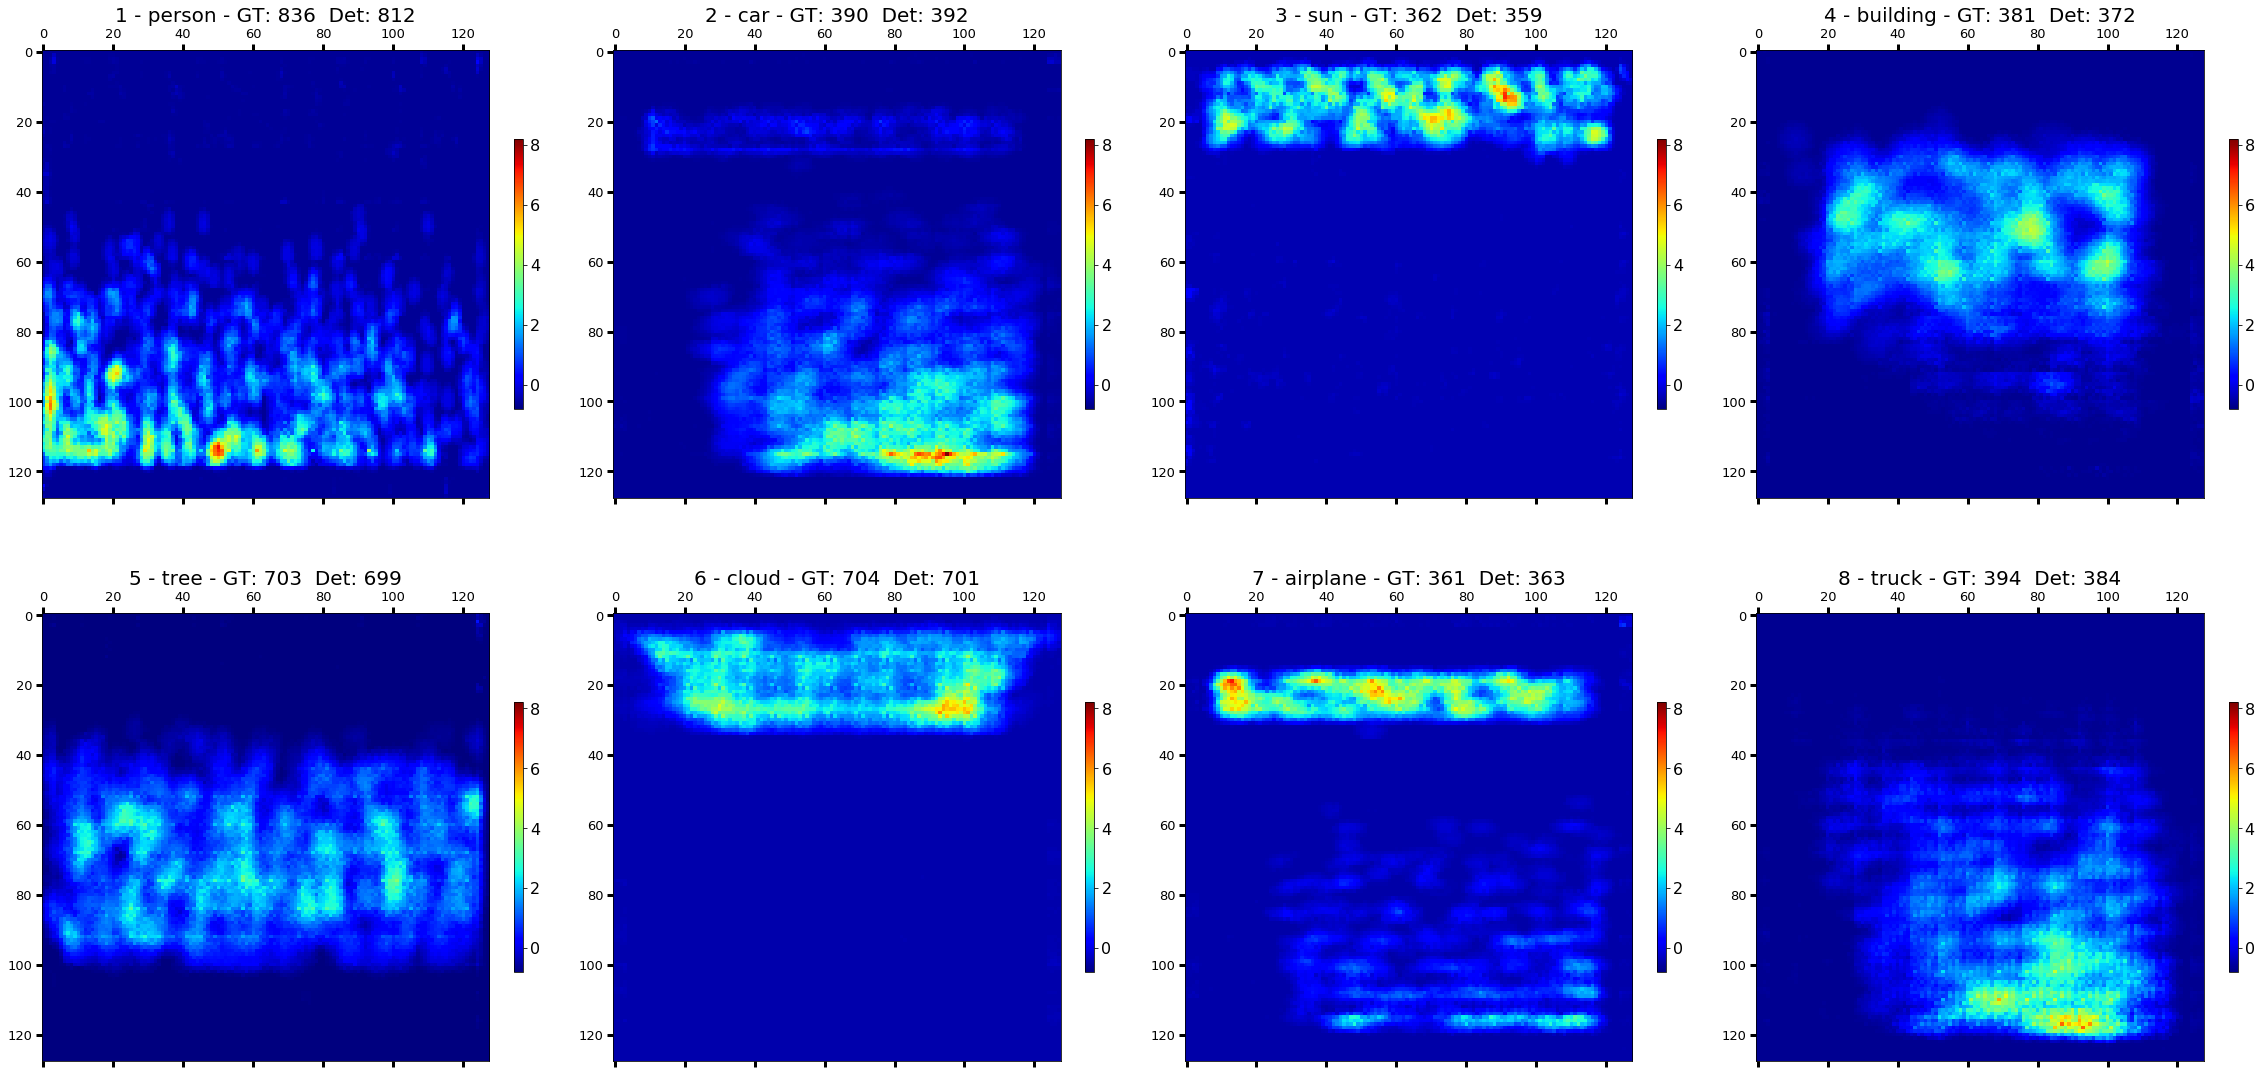

In [79]:
# fig= vis2.display_fcn_agg_heatmaps(vis2.deprocess_image(fcn_agg_hm_clipped), gt_cls_counts, dt_cls_counts, CLASS_NAMES, CLASS_IDS,  cmap = 'jet', \
fig= vis2.display_fcn_agg_heatmaps(vis2.standardize_fcn_hm(fcn_agg_hm_clipped), gt_cls_counts, dt_cls_counts, CLASS_NAMES, CLASS_IDS,  cmap = 'jet', \
                                   columns = 4) ## title = 'fcn heatmaps - clipped to [0 ,1] and Normalized - ')

In [80]:
weights_histogram = os.path.join(save_path , 'ns2_'+mode+'_hm_FCN_clipped_standardized.png')
print(weights_histogram)
fig.savefig(weights_histogram)

/home/kbardool/mrcnn3/train_newshapes_2/other/ns2_test_hm_FCN_clipped_standardized.png


### 2D Plots  

####  2D plot of `model_gt_heatmap` returned from model

In [30]:
fig = visualize.plot_2d_heatmap(model_gt_heatmap, model_gt_heatmap_scores, img_id, gt_class_ids, 
                          class_names = coco_class_names, columns = 3, scale = 4, scaling = 'all')

NameError: name 'model_gt_heatmap' is not defined

####  2D plot of `pred_heatmap_norm` returned from MRCNN 

In [ ]:
fig = visualize.plot_2d_heatmap(model_pr_heatmap, model_pr_heatmap_scores, img_id, pr_class_ids, columns = 3, 
                            class_names = coco_class_names, scale = 4, scaling = 'all')

####  2D plot of `model_fcn_heatmap` returned from model

In [ ]:
fig = visualize.plot_2d_heatmap(model_fcn_heatmap, model_pr_heatmap_scores, img_id, pr_class_ids, columns = 3,
                          class_names = coco_class_names, scale = 4, scaling = 'all')

####  2D plot of `model_fcn_heatmap` returned from model - ALL CLASSES

In [ ]:
fig = visualize.plot_2d_heatmap(model_fcn_heatmap, model_gt_heatmap_scores, img_id,
                                class_names = coco_class_names, columns = 3, scale = 4, scaling = 'all')

In [ ]:
fig.savefig('fcn_heatmaps_2d.png')

####  2D comparative display `pred_heatmap` / `fcn_heatmap`  

In [ ]:
fig = visualize.plot_2d_heatmap_compare(model_pr_heatmap, model_fcn_heatmap, model_pr_heatmap_scores, 
                        img_id, class_ids = pr_class_ids, class_names = coco_class_names, scale = 4, scaling = True )    

###  3D Plots

####  3D plot of  `gt_heatmap_norm` returned form code above

In [ ]:
print('Image : {}  ClassIds: {}'.format(img_id, gt_class_ids))
visualize.plot_3d_heatmap(model_gt_heatmap, img_id, gt_class_ids, class_names = coco_class_names, scaling='class')

####  3D plot of `pred_heatmap_norm` returned form model

In [ ]:
print('Image : {}  ClassIds: {}'.format(img_id, pr_class_ids))
visualize.plot_3d_heatmap(model_pr_heatmap, img_id, pr_class_ids, class_names = coco_class_names, zlim = 'class' , scaling = 'none')

####  3D plot of `fcn_heatmap` returned form model - only classes in pred_scores

In [ ]:
print(np.max(model_fcn_heatmap), np.min(model_fcn_heatmap))

print('Image : {}  ClassIds: {}'.format(img_id, pr_class_ids))
visualize.plot_3d_heatmap(model_fcn_heatmap, img_id, pr_class_ids,class_names = coco_class_names, scaling = 'none')

####  3D plot of `fcn_heatmap` returned form model - all classes

In [ ]:
print('Image : {}  ClassIds: {}'.format(img_id, pr_class_ids))
#     plot_3d_heatmap(model_fcn_heatmap, img_id, class_ids,class_names = class_names, size = (8,8), zlim=0)
visualize.plot_3d_heatmap(model_fcn_heatmap, img_id, class_names = coco_class_names, columns = 3,scaling = 'all')

####  3D comparative display `pred_heatmap` / `fcn_heatmap` 

In [ ]:
print('Image : {}  ClassIds: {}'.format(img_id, pr_class_ids))
visualize.plot_3d_heatmap_compare(model_pr_heatmap, model_fcn_heatmap, img_id, class_ids = pr_class_ids, 
                            class_names = coco_class_names, size=(8,8), zlim = 'all' , scaling = 'all')

####  3D comparative display `gt_heatmap` / `fcn_heatmap` 

In [ ]:
print('Image : {}  ClassIds: {}'.format(img_id, gt_class_ids))
visualize.plot_3d_heatmap_compare(model_gt_heatmap, model_fcn_heatmap, img_id, gt_class_ids, class_names = coco_class_names, scaling = 'none')

### Overlay predictions on image

#### Overlay image with gt_heatmaps

In [ ]:
visualize.display_heatmaps_mrcnn(mrcnn_input, mrcnn_output, 0, hm = 'gt', columns = 3, 
                     config = mrcnn_model.config, class_ids = gt_class_ids, class_names = coco_class_names)

#### Overlay image with pred_heatmaps

In [ ]:
visualize.display_heatmaps_mrcnn(mrcnn_input, mrcnn_output, 0, hm = 'pr', columns = 3,
                     config = mrcnn_model.config, class_ids = pr_class_ids, class_names = coco_class_names)

#### Overlay image with fcn_heatmaps

In [ ]:
visualize.display_heatmaps_mrcnn_fcn(mrcnn_input, mrcnn_output, 0, heatmap = model_fcn_heatmap, hm = 'gt', columns = 3,
                     config = mrcnn_model.config, class_ids = gt_class_ids, class_names = coco_class_names, scaling = 'clip')

In [ ]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: center;
}
</style>
""")

#### Overlay image with gt_heatmaps and fcn_heatmaps

In [ ]:
visualize.display_heatmaps_compare(mrcnn_input, mrcnn_output, heatmap = model_fcn_heatmap, image_id = 0, 
                                   hm = 'gt', config = mrcnn_model.config, class_ids = gt_class_ids, class_names = coco_class_names, scaling = 'each')

#### Overlay image with pr_heatmaps and fcn_heatmaps

In [ ]:
visualize.display_heatmaps_compare(mrcnn_input, mrcnn_output, heatmap = model_fcn_heatmap, image_id = 0, hm = 'pr', 
                     config = mrcnn_model.config, class_ids = gt_class_ids, class_names = coco_class_names, scaling = 'each')